The data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Importing necessary libraries, to load and analyse the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv("Sparkling.csv")

In [4]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
df_2 = pd.read_csv("Sparkling.csv")

In [7]:
df.isna().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
dates = pd.date_range(start='1980-01-01',freq='MS', periods=len(df_2))

In [10]:
dates

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [11]:
import calendar
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df['Year'] = dates.year

In [12]:
df

YearMonth  Sparkling Month  Year
0     1980-01       1686   Jan  1980
1     1980-02       1591   Feb  1980
2     1980-03       2304   Mar  1980
3     1980-04       1712   Apr  1980
4     1980-05       1471   May  1980
..        ...        ...   ...   ...
182   1995-03       1897   Mar  1995
183   1995-04       1862   Apr  1995
184   1995-05       1670   May  1995
185   1995-06       1688   Jun  1995
186   1995-07       2031   Jul  1995

[187 rows x 4 columns]

In [13]:
df.drop(['YearMonth'], axis=1, inplace=True)
#df.rename(columns={'Rose':'Rose-Wine-Sales'}, inplace=True)
df = df[['Month', 'Year', 'Sparkling']]


In [14]:
df.head()

Month  Year  Sparkling
0   Jan  1980       1686
1   Feb  1980       1591
2   Mar  1980       2304
3   Apr  1980       1712
4   May  1980       1471

In [15]:
df.set_index(dates, inplace=True)

In [16]:
df.head()

Month  Year  Sparkling
1980-01-01   Jan  1980       1686
1980-02-01   Feb  1980       1591
1980-03-01   Mar  1980       2304
1980-04-01   Apr  1980       1712
1980-05-01   May  1980       1471

In [17]:
df.tail()

Month  Year  Sparkling
1995-03-01   Mar  1995       1897
1995-04-01   Apr  1995       1862
1995-05-01   May  1995       1670
1995-06-01   Jun  1995       1688
1995-07-01   Jul  1995       2031

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      187 non-null    object
 1   Year       187 non-null    int64 
 2   Sparkling  187 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.8+ KB


In [19]:
# Plotting Time Series to understand better.

In [20]:
# extract out the time-series
sales_ts = df['Sparkling']

Text(0, 0.5, 'Sparkling')

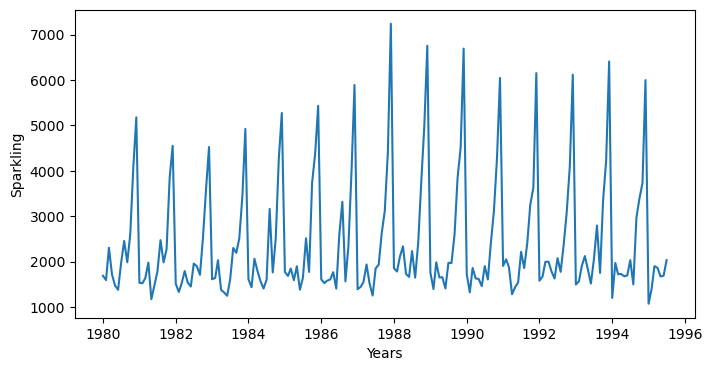

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')

- In the above plot we have 15 years of data for the wine sales which is from 1980 to 1995.
- We can also see the clear spike in the last quarter of every year, which means there is a seasonality.
- Time Series looks flat, there is no trend.

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

<AxesSubplot:xlabel='Sparkling'>

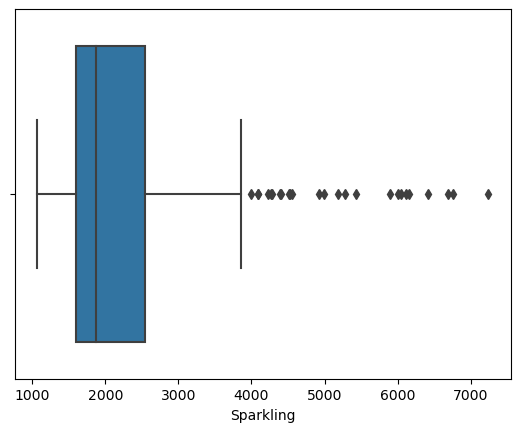

In [22]:
sns.boxplot(data = df, x = df['Sparkling'])

In [23]:
df1 = pd.read_csv('Sparkling.csv')

In [24]:
df1['Time_Stamp'] = pd.DataFrame(dates,columns=['Month'])
df.head()

Month  Year  Sparkling
1980-01-01   Jan  1980       1686
1980-02-01   Feb  1980       1591
1980-03-01   Mar  1980       2304
1980-04-01   Apr  1980       1712
1980-05-01   May  1980       1471

In [25]:
df1['Time_Stamp'] = pd.to_datetime(df1['Time_Stamp'])

In [26]:
df = df1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

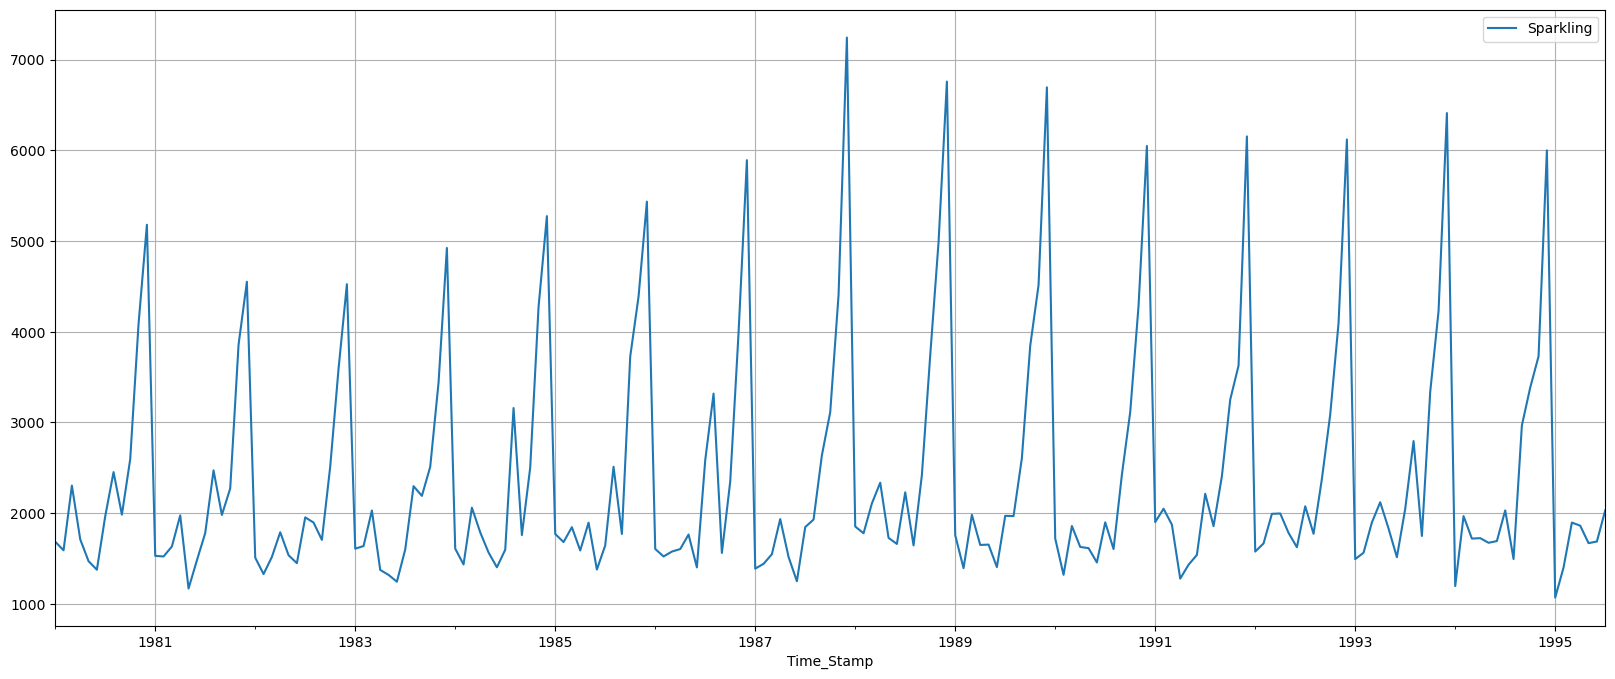

In [27]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

- In the above plot we have 15 years of data for the wine sales which is from 1980 to 1995.
- We can also see the clear spike in the last quarter of every year.

#### Yearly Boxplot

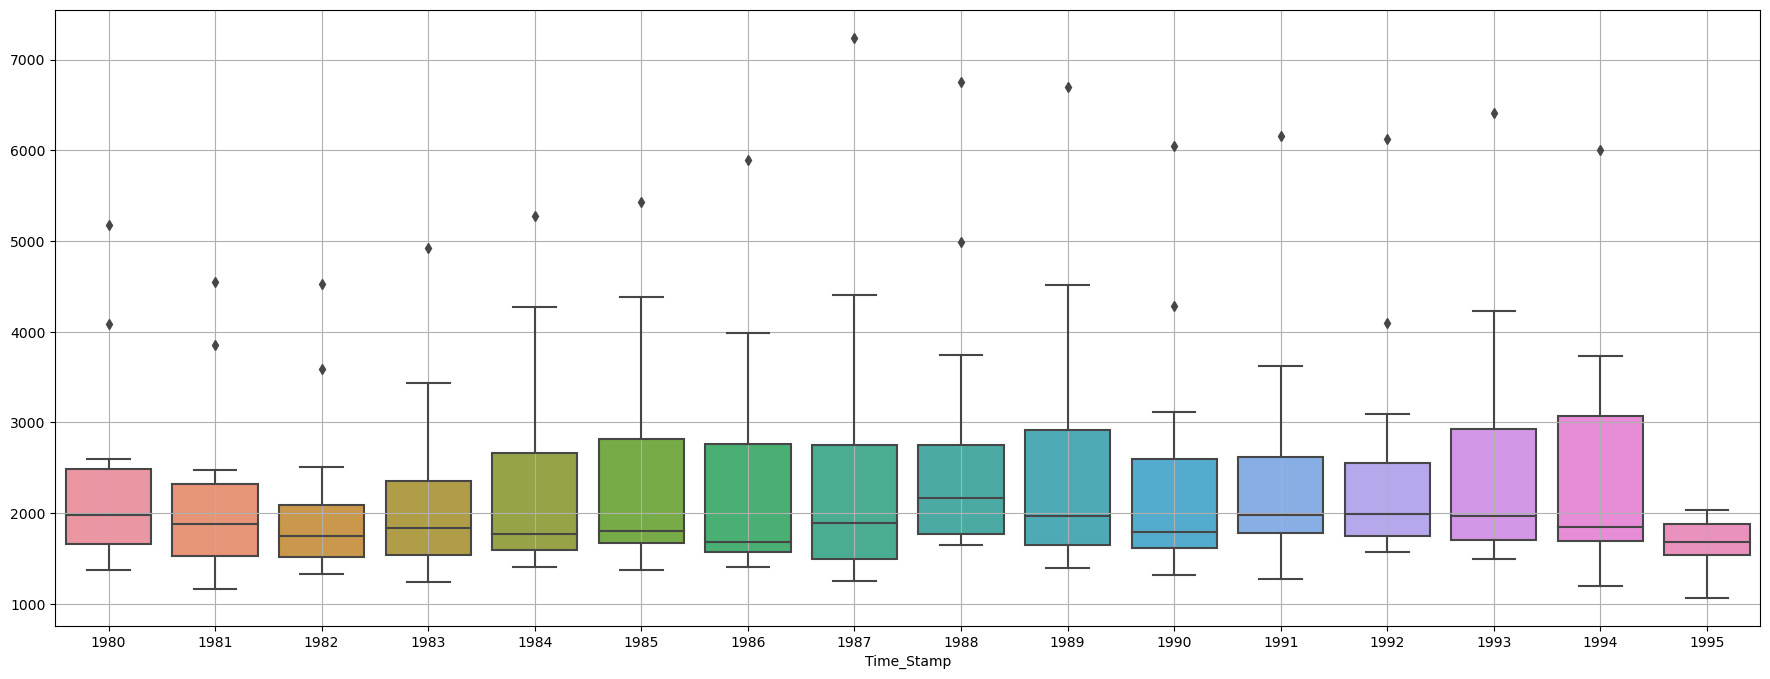

In [28]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

- as we can see the boxplot acorrs all the years with 50th percentile is alomost same with slight deviation (+/- 200) 

#### Monthly Boxplot

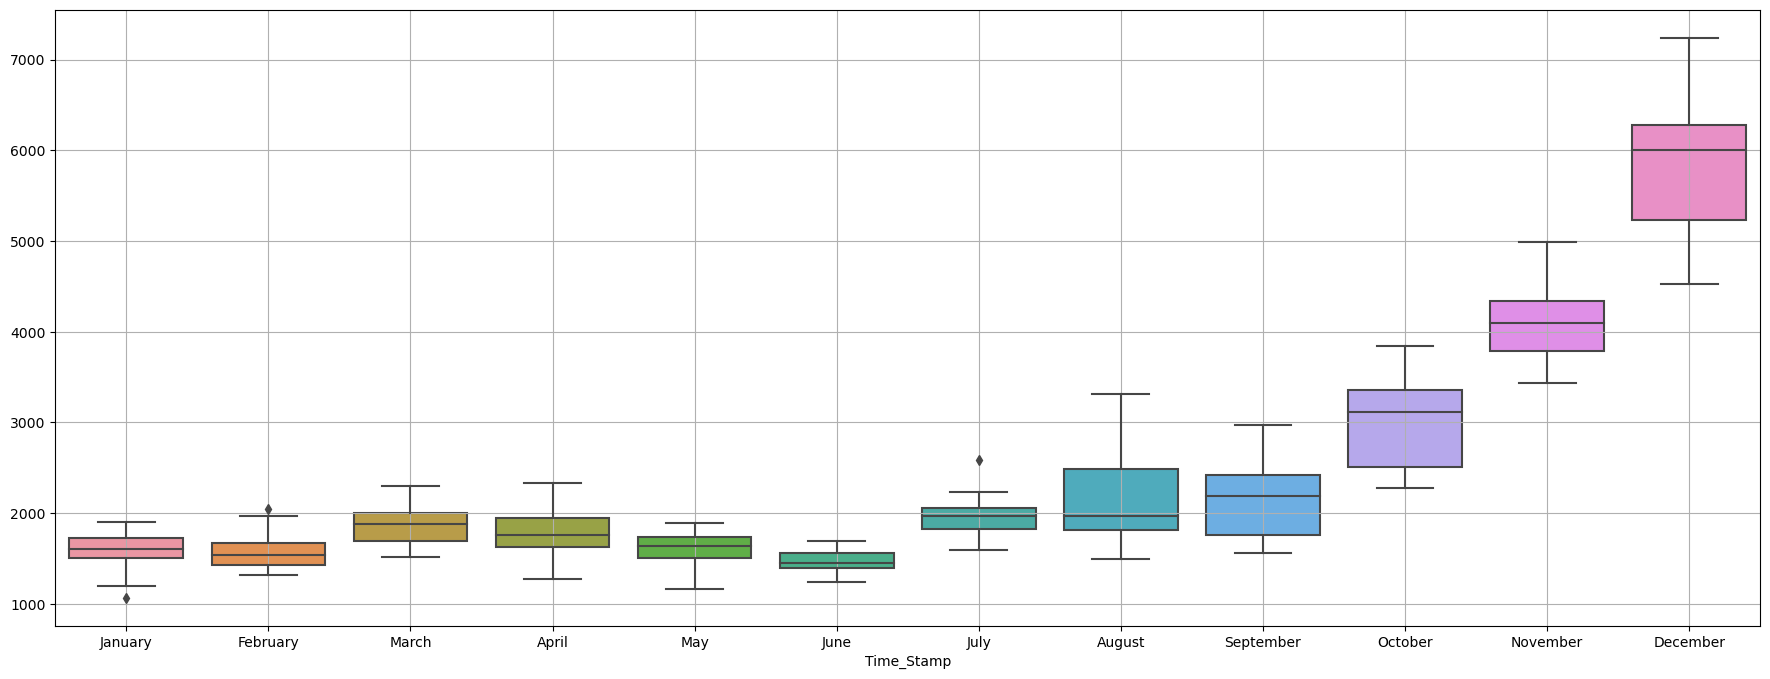

In [29]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

- When we divide all months sales seperately, we see the December month the sales are high and in the June month sales are minimum.

## Decomposition

In [30]:
import statsmodels.api as sm

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

#### Additive Decomposition

In [32]:
sales_ts = df.Sparkling

In [33]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='additive')

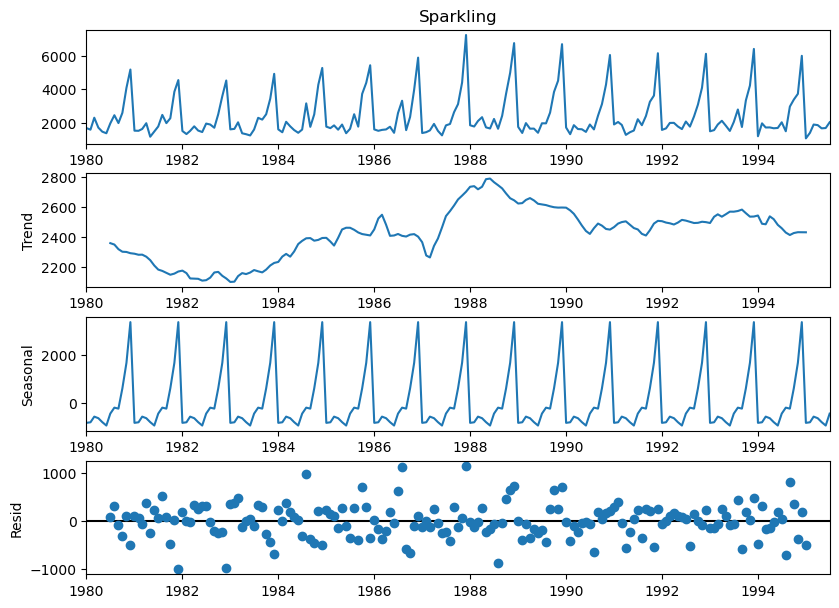

In [34]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
plt.show()

#### Multiplicative Decomposition

In [35]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

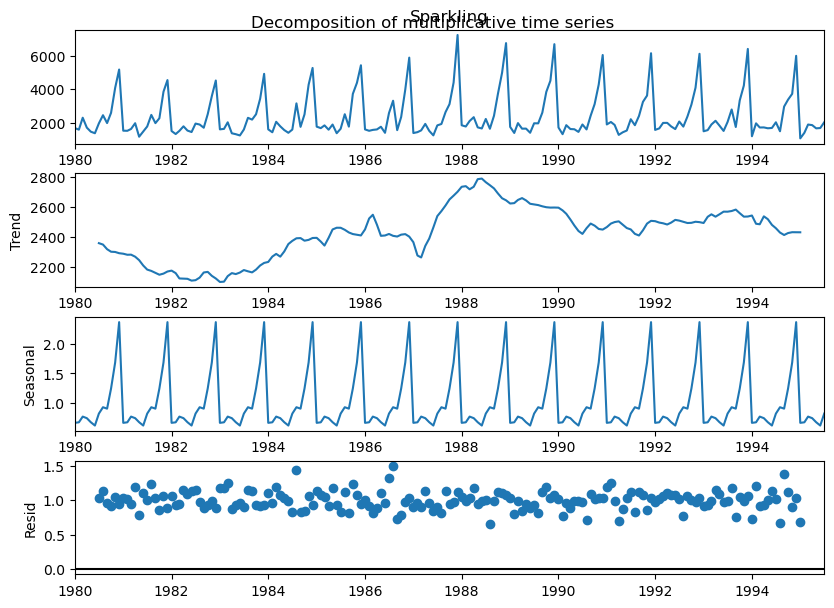

In [36]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(24),'\n')
print('Seasonality','\n',seasonality.head(24),'\n')
print('Residual','\n',residual.head(24),'\n')

Trend 
 Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
1981-01-01    2290.375000
1981-02-01    2283.458333
1981-03-01    2284.125000
1981-04-01    2270.541667
1981-05-01    2247.500000
1981-06-01    2211.750000
1981-07-01    2184.750000
1981-08-01    2175.833333
1981-09-01    2162.958333
1981-10-01    2150.416667
1981-11-01    2157.958333
1981-12-01    2171.958333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
1981-01-01    0.649843
198

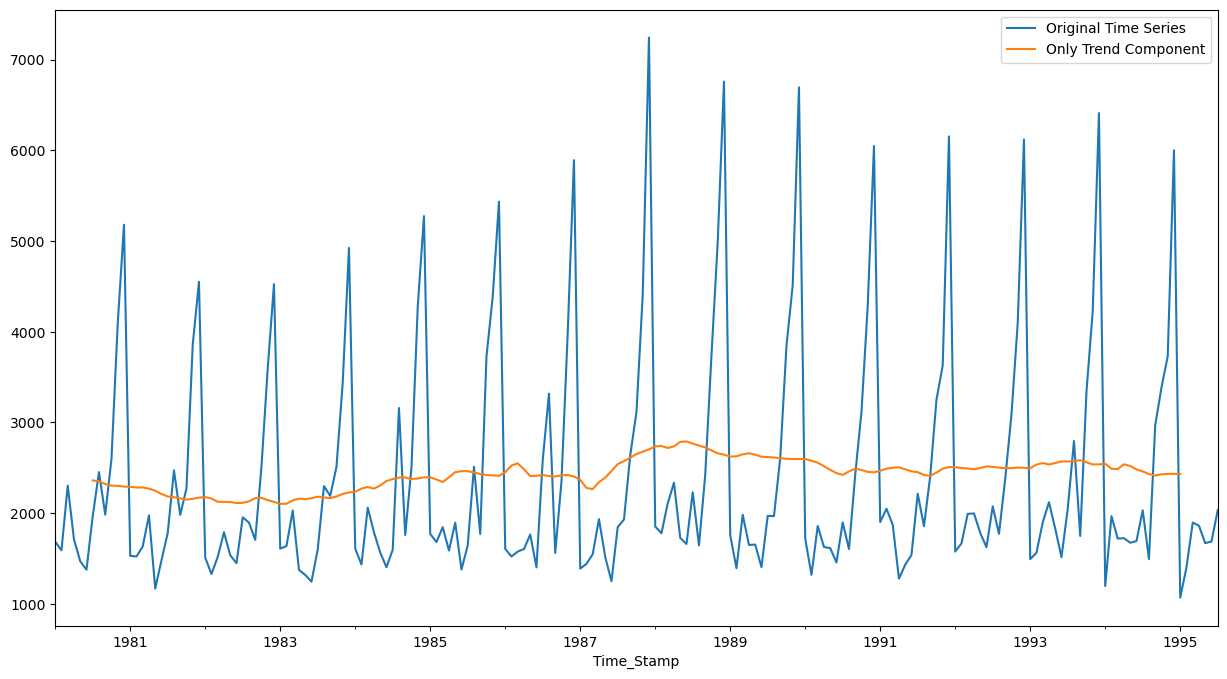

In [38]:
df.plot()
trend.plot()
plt.legend(["Original Time Series", "Only Trend Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

In [39]:
#Separate data into train and test
df['Dates'] = df.index
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [40]:
train.head()

Sparkling      Dates
Time_Stamp                      
1980-01-01       1686 1980-01-01
1980-02-01       1591 1980-02-01
1980-03-01       2304 1980-03-01
1980-04-01       1712 1980-04-01
1980-05-01       1471 1980-05-01

In [41]:
train.tail()

Sparkling      Dates
Time_Stamp                      
1990-08-01       1605 1990-08-01
1990-09-01       2424 1990-09-01
1990-10-01       3116 1990-10-01
1990-11-01       4286 1990-11-01
1990-12-01       6047 1990-12-01

In [42]:
test.head()

Sparkling      Dates
Time_Stamp                      
1991-01-01       1902 1991-01-01
1991-02-01       2049 1991-02-01
1991-03-01       1874 1991-03-01
1991-04-01       1279 1991-04-01
1991-05-01       1432 1991-05-01

In [43]:
test.head()

Sparkling      Dates
Time_Stamp                      
1991-01-01       1902 1991-01-01
1991-02-01       2049 1991-02-01
1991-03-01       1874 1991-03-01
1991-04-01       1279 1991-04-01
1991-05-01       1432 1991-05-01

In [44]:
train.shape

(132, 2)

In [45]:
test.shape

(55, 2)

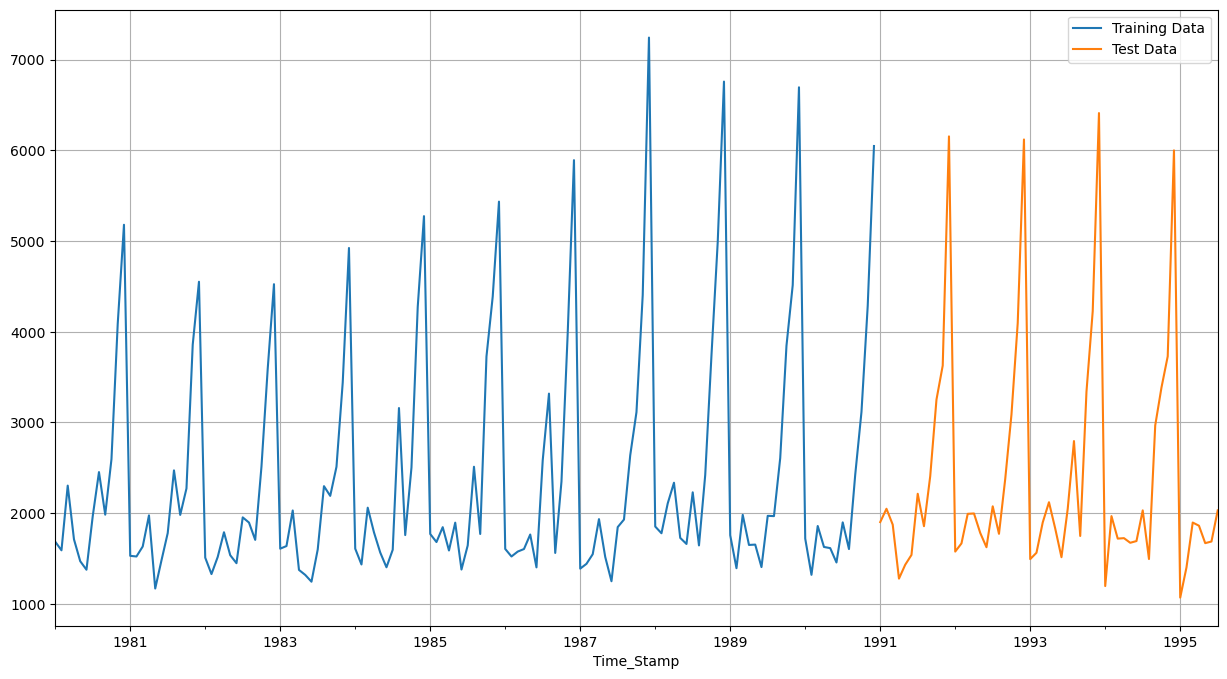

In [46]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [48]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

### Simple Exponentail smoothing

In [49]:
SES_train = train.copy()
SES_test = test.copy()

In [50]:
# Declaring an object which has been instantiated by the training data
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
# Adding the fitted values (predictions on the training set) to the training set data frame
SES_train['predict'] = model_SES_autofit.fittedvalues
print(SES_train.head(),'\n')
print(SES_train.tail(),'\n')

            Sparkling      Dates      predict
Time_Stamp                                   
1980-01-01       1686 1980-01-01  1818.535750
1980-02-01       1591 1980-02-01  1811.961001
1980-03-01       2304 1980-03-01  1800.999709
1980-04-01       1712 1980-04-01  1825.952226
1980-05-01       1471 1980-05-01  1820.299357 

            Sparkling      Dates      predict
Time_Stamp                                   
1990-08-01       1605 1990-08-01  2469.859218
1990-09-01       2424 1990-09-01  2426.955835
1990-10-01       3116 1990-10-01  2426.809204
1990-11-01       4286 1990-11-01  2460.998140
1990-12-01       6047 1990-12-01  2551.531665 



In [53]:
# Using the fitted model on the training set to forecast on the test set
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      Dates      predict
Time_Stamp                                   
1991-01-01       1902 1991-01-01  2724.932624
1991-02-01       2049 1991-02-01  2724.932624
1991-03-01       1874 1991-03-01  2724.932624
1991-04-01       1279 1991-04-01  2724.932624
1991-05-01       1432 1991-05-01  2724.932624

- Insights: In Simple Exponantial Smoothing we 

##### Model Evaluation for different  $\alpha$  : Simple Exponential Smoothing

In [54]:
from sklearn import metrics

In [55]:
## First we will define an empty dataframe to store our values from the loop

resultsDf = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [56]:
# Defining a loop which iterates from 0.1 to 1 at an interval of 0.1.
for i in np.arange(0.1,1.1,0.1):
    # Fitting the Simple Exponential Smoothing model with different alpha values got from the defined loop above
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    # Storing the predicted values of the training set in the training data frame. 
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    # Storing the predicted values of the test set in the test data frame
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    # Evaluating the predictions on the training set using the RMSE and MAPE
    rmse_model1_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model1_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    # Evaluating the predictions on the test set using the RMSE and MAPE
    rmse_model1_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model1_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    # Adding all the RMSE and MAPE values for both training and test set for their corresponding alpha values.
    resultsDf = resultsDf.append({'Alpha Values':i,'Train RMSE':rmse_model1_train_i 
                                      ,'Train MAPE': mape_model1_train_i,'Test RMSE':rmse_model1_test_i
                                      ,'Test MAPE':mape_model1_test_i}, ignore_index=True)

In [57]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


Alpha Values   Train RMSE  Train MAPE    Test RMSE   Test MAPE
0           0.1  1333.873836   41.891584  1375.393398   58.065993
1           0.2  1356.042987   44.716378  1595.206839   75.835713
2           0.3  1359.511747   45.291824  1935.507132   97.899850
3           0.4  1352.588879   44.829346  2311.919615  119.766111
4           0.5  1344.004369   43.586790  2666.351413  139.360359

Sorting the Values by the MAPE on the test set


Alpha Values   Train RMSE  Train MAPE    Test RMSE   Test MAPE
0           0.1  1333.873836   41.891584  1375.393398   58.065993
1           0.2  1356.042987   44.716378  1595.206839   75.835713
2           0.3  1359.511747   45.291824  1935.507132   97.899850
3           0.4  1352.588879   44.829346  2311.919615  119.766111
4           0.5  1344.004369   43.586790  2666.351413  139.360359

In [58]:
## Training Data

rmse_model1_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model1_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])

## Test Data

rmse_model1_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model1_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])

In [59]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1],'Test MAPE': [mape_model1_test_1]},index=['Alpha=0.1,SimpleExponentialSmoothing'])
resultsDf

Test RMSE  Test MAPE
Alpha=0.1,SimpleExponentialSmoothing  1316.035487  50.940345

###### The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### Plotting Simple Exponantial Smoothing with best alpha value 0.1

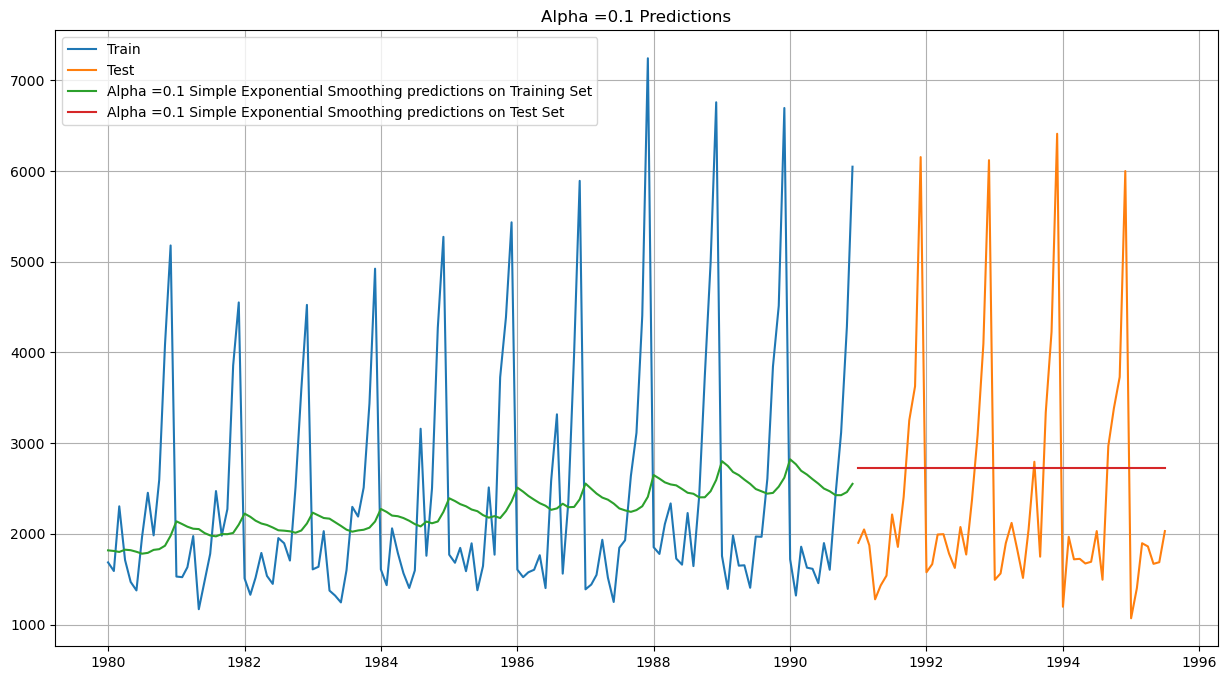

In [60]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions');

### Double Exponantial Smoothing

In [61]:
## Making copies of the training and test set
DES_train = train.copy()
DES_test = test.copy()

In [62]:
# Declaring an object which has been instantiated by the training data
model_DES = Holt(DES_train['Sparkling'])

# Fitting the Double Exponential Smoothing model and asking python to choose the optimal parameters
model_DES_autofit = model_DES.fit(optimized=True)

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
# Adding the fitted values (predictions on the training set) to the training set data frame
DES_train['predict'] = model_DES_autofit.fittedvalues
print(DES_train.head(),'\n')
print(DES_train.tail(),'\n')

            Sparkling      Dates      predict
Time_Stamp                                   
1980-01-01       1686 1980-01-01  1591.000000
1980-02-01       1591 1980-02-01  1561.420827
1980-03-01       2304 1980-03-01  1486.796779
1980-04-01       1712 1980-04-01  1954.564417
1980-05-01       1471 1980-05-01  1692.589636 

            Sparkling      Dates      predict
Time_Stamp                                   
1990-08-01       1605 1990-08-01  1642.980594
1990-09-01       2424 1990-09-01  1523.028837
1990-10-01       3116 1990-10-01  2049.674471
1990-11-01       4286 1990-11-01  2690.251822
1990-12-01       6047 1990-12-01  3695.484361 



In [65]:
# Using the fitted model on the training set to forecast on the test set
DES_test['predict'] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling      Dates      predict
Time_Stamp                                   
1991-01-01       1902 1991-01-01  5221.278699
1991-02-01       2049 1991-02-01  5127.886554
1991-03-01       1874 1991-03-01  5034.494409
1991-04-01       1279 1991-04-01  4941.102264
1991-05-01       1432 1991-05-01  4847.710119

In [66]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_DES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [67]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from this loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from this loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit the
# the Double Exponential model by varying different alpha and beta parameters. The way Python runs these set of loops is
# it fixes the value of 'i' (which is alpha) and varies all the values of 'j' (which is beta).

        # Fitting the Double Exponential Smoothing model with appropriate i and j values from the loop
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        # Predicting on the training set
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        # Predicting on the training set
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Model Evaluation using RMSE and MAPE on for the training data predictions
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        # Model Evaluation using RMSE and MAPE on for the test data predictions
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        # Putting all the model evaluation results into one data frame with their corresponding alpha and beta values
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [68]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf_DES.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf_DES.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  \
0            0.1          0.1  1382.520870   44.731643  1778.564670   
1            0.1          0.2  1413.598835   47.112192  2599.439986   
10           0.2          0.1  1418.041591   47.982654  3611.763322   
2            0.1          0.3  1445.762015   48.496713  4293.084674   
20           0.3          0.1  1431.169601   49.123296  5908.185554   

     Test MAPE  
0    85.874037  
1   125.772168  
10  177.929258  
2   202.571279  
20  286.406404

Sorting the Values by the MAPE on the test set


Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  \
0            0.1          0.1  1382.520870   44.731643  1778.564670   
1            0.1          0.2  1413.598835   47.112192  2599.439986   
10           0.2          0.1  1418.041591   47.982654  3611.763322   
2            0.1          0.3  1445.762015   48.496713  4293.084674   
3            0.1          0.4  1480.897776   50.039723  6039.537339   

     Test MAPE  
0    85.874037  
1   125.772168  
10  177.929258  
2   202.571279  
3   280.335660

In [69]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [resultsDf_DES['Test RMSE'][0],resultsDf_DES['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_DES['Test MAPE'][0],resultsDf_DES['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing','Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf

Test RMSE  Test MAPE
Alpha=0.1,SimpleExponentialSmoothing           1316.035487  50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670  85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing  1778.564670  85.874037

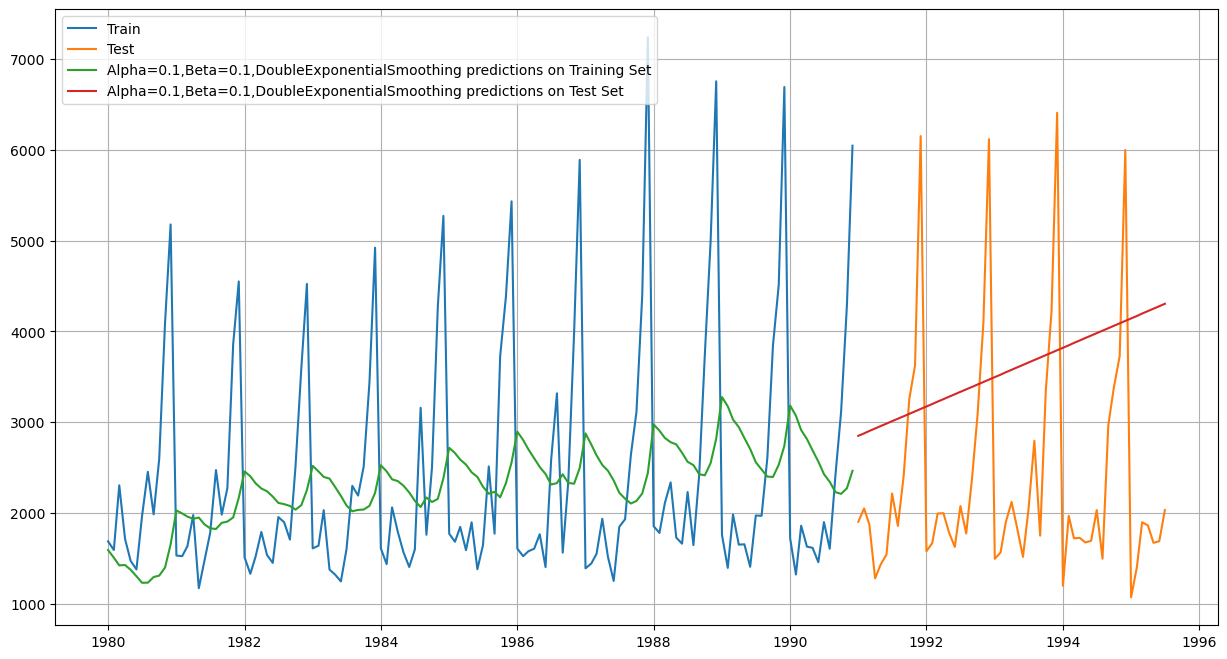

In [70]:
## Plotting on both the Training and Test data

plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Triple Exponantial Smoothing

In [71]:
TES_train = train.copy()
TES_test = test.copy()

In [72]:
# Declaring an object which has been instantiated by the training data. We are setting the seasonality 
# to be multiplicative

model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

model_TES_autofit = model_TES.fit(optimized=True)

In [73]:
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling      Dates  auto_predict
Time_Stamp                                    
1980-01-01       1686 1980-01-01   1672.833311
1980-02-01       1591 1980-02-01   1595.693517
1980-03-01       2304 1980-03-01   2112.222086
1980-04-01       1712 1980-04-01   1885.631985
1980-05-01       1471 1980-05-01   1513.851816

In [75]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling      Dates  auto_predict
Time_Stamp                                    
1991-01-01       1902 1991-01-01   1587.497468
1991-02-01       2049 1991-02-01   1356.394925
1991-03-01       1874 1991-03-01   1762.929755
1991-04-01       1279 1991-04-01   1656.165933
1991-05-01       1432 1991-05-01   1542.002730

In [76]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])

## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])

In [77]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [78]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from the loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from the loop
        for k in np.arange(0.1,1.1,0.1): #Defining the gamma values from the loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit 
# the Triple Exponential model by varying different alpha and beta parameters. 


            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_TES = resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [79]:
print('Sorting the values with respect to RMSE:')
display(resultsDf_TES.sort_values(by=['Test RMSE']).head())
print('Sorting the values with respect to RMSE:')
display(resultsDf_TES.sort_values(by=['Test MAPE']).head())

Sorting the values with respect to RMSE:


Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
301           0.4          0.1           0.2  384.467709   11.774341   
211           0.3          0.2           0.2  388.544148   11.862672   
200           0.3          0.1           0.1  388.220071   11.936260   
110           0.2          0.2           0.1  398.482510   11.944363   
402           0.5          0.1           0.3  396.598057   12.039252   

      Test RMSE  Test MAPE  
301  317.434302  11.534936  
211  329.037543  12.201611  
200  337.080969  12.213243  
110  340.186457  12.473345  
402  345.913415  12.373313

Sorting the values with respect to RMSE:


Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
301           0.4          0.1           0.2  384.467709   11.774341   
211           0.3          0.2           0.2  388.544148   11.862672   
200           0.3          0.1           0.1  388.220071   11.936260   
402           0.5          0.1           0.3  396.598057   12.039252   
110           0.2          0.2           0.1  398.482510   11.944363   

      Test RMSE  Test MAPE  
301  317.434302  11.534936  
211  329.037543  12.201611  
200  337.080969  12.213243  
402  345.913415  12.373313  
110  340.186457  12.473345

In [80]:
resultsDf_TES = pd.DataFrame({'Test RMSE': [resultsDf_TES['Test RMSE'][301],resultsDf_TES['Test RMSE'][211]],
                              'Test MAPE':[resultsDf_TES['Test MAPE'][301],resultsDf_TES['Test MAPE'][211]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing',
                                  'Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_TES])
resultsDf

Test RMSE  Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487  50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670  85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670  85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302  11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543  12.201611

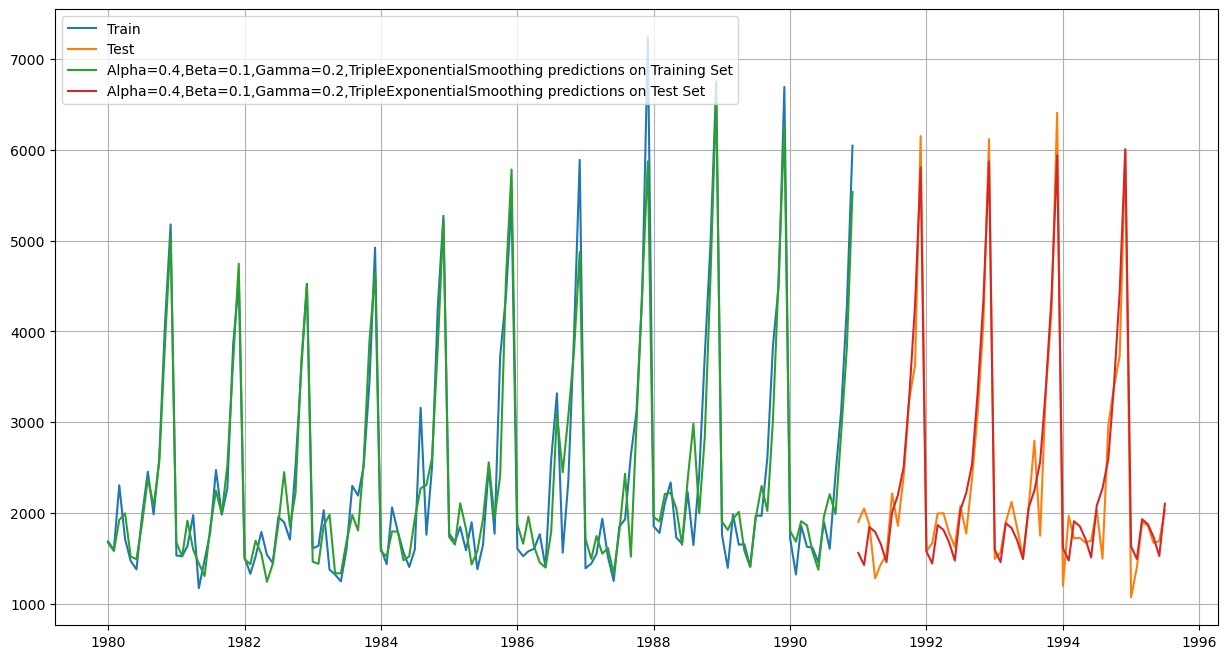

In [81]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

## Plotting the actual training and test data
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

## Alpha=0.4,Beta=0.1,Gamma=0.2 (model which has the minimum RMSE on the test data)
plt.plot(TES_train['predict',0.4,0.1,0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict',0.4,0.1,0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## Linear Regression

In [82]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time,'\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [83]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [84]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling      Dates  time
Time_Stamp                            
1980-01-01       1686 1980-01-01     1
1980-02-01       1591 1980-02-01     2
1980-03-01       2304 1980-03-01     3
1980-04-01       1712 1980-04-01     4
1980-05-01       1471 1980-05-01     5 

Last few rows of Training Data 
             Sparkling      Dates  time
Time_Stamp                            
1990-08-01       1605 1990-08-01   128
1990-09-01       2424 1990-09-01   129
1990-10-01       3116 1990-10-01   130
1990-11-01       4286 1990-11-01   131
1990-12-01       6047 1990-12-01   132 


First few rows of Test Data 
             Sparkling      Dates  time
Time_Stamp                            
1991-01-01       1902 1991-01-01   133
1991-02-01       2049 1991-02-01   134
1991-03-01       1874 1991-03-01   135
1991-04-01       1279 1991-04-01   136
1991-05-01       1432 1991-05-01   137 

Last few rows of Test Data 
             Sparkling      Dates  time
Time_Stam

In [85]:
# Importing the Linear Regression function from sklearn

from sklearn.linear_model import LinearRegression

In [86]:
# Defining a Linear Regression object class

lr = LinearRegression()

# Fitting the linear regression on the training data with the appropriate training data.

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

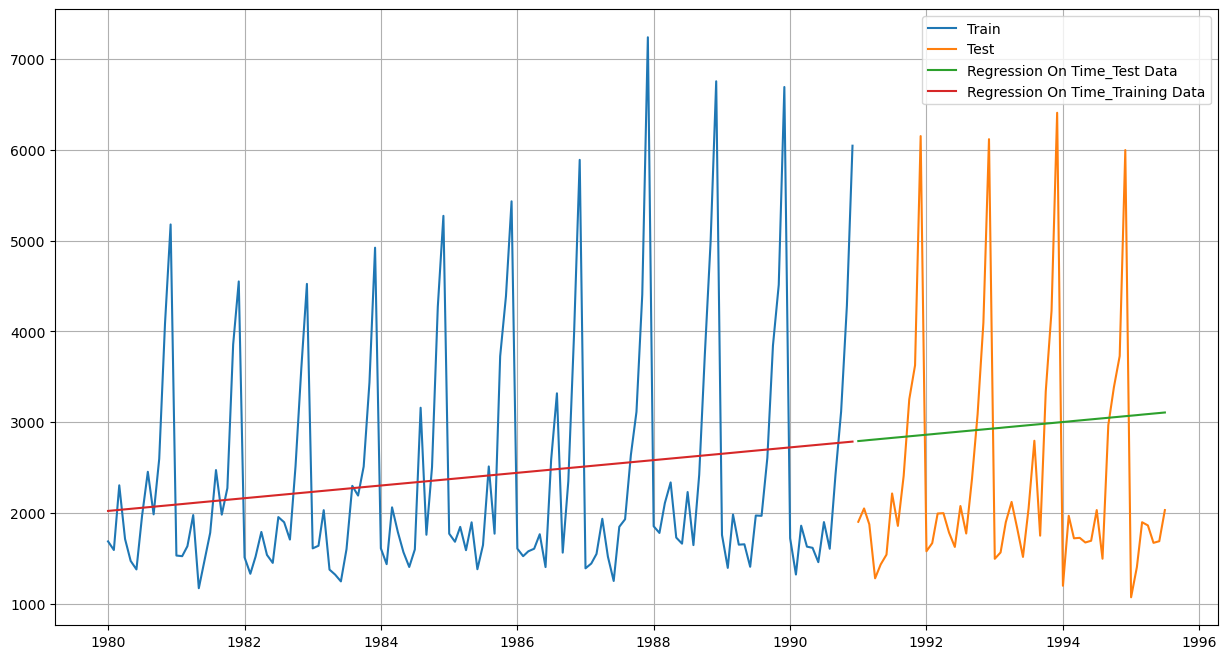

In [87]:
# Generating the predictions on the training data
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
# Adding the predictions on the training set to the afore-defined Linear Regression Training data
LinearRegression_train['RegonTime'] = train_predictions_model1

# Generating the predictions on the test data
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
# Adding the predictions on the test set to the afore-defined Linear Regression Test data
LinearRegression_test['RegonTime'] = test_predictions_model1

# Plotting the actual training data
plt.plot( train['Sparkling'], label='Train')
# Plotting the actual test data
plt.plot(test['Sparkling'], label='Test')
# Plotting the predicted training data
plt.plot(LinearRegression_test['RegonTime'], label='Regression On Time_Test Data')
# Plotting the predicted test data
plt.plot(LinearRegression_train['RegonTime'], label='Regression On Time_Training Data')
# Setting the location of the legend
plt.legend(loc='best')
plt.grid();

In [88]:
from sklearn import metrics

In [89]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [90]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)

## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)


In [91]:
resultsDf_Lin = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_Lin])
resultsDf

Test RMSE  Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487  50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670  85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670  85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302  11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543  12.201611
RegressionOnTime                                    1389.135175  59.345572

## Naive Approach

In [92]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [93]:
## Let us get the last value (or the most recent value) of the training set and add it to column in our test set
## as that is our prediction.

NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

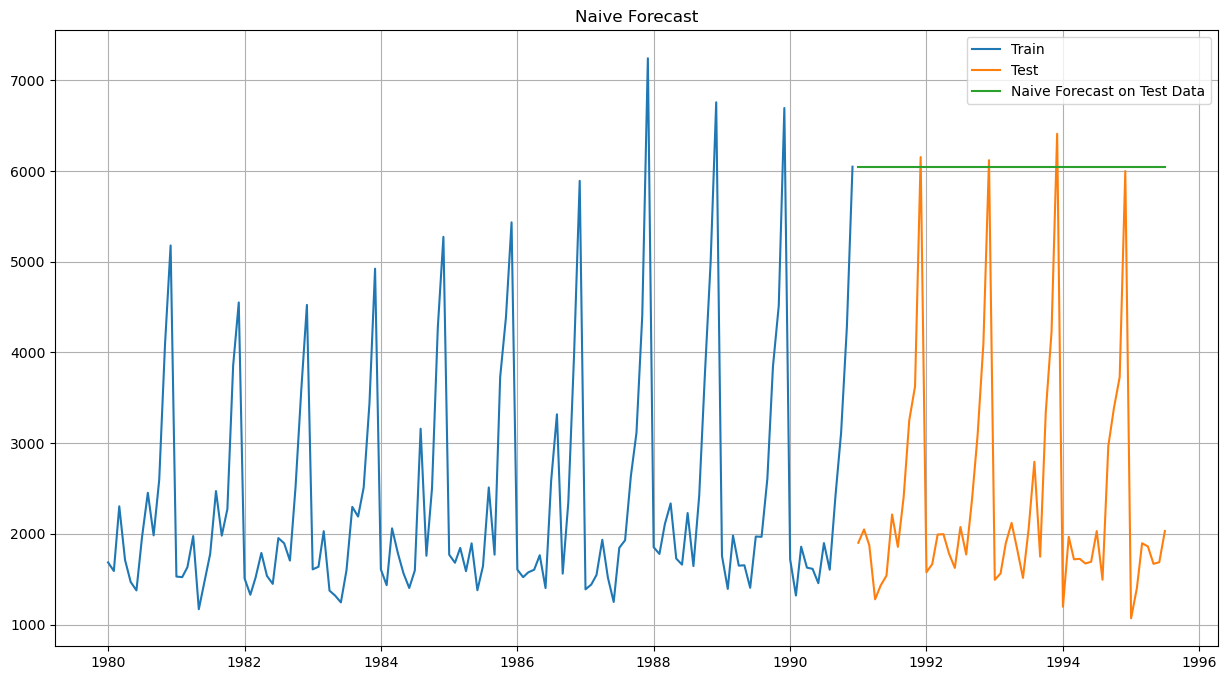

In [94]:
## Plotting the actual training data
plt.plot(NaiveModel_train['Sparkling'], label='Train')
## Plotting the acutal test data
plt.plot(test['Sparkling'], label='Test')
## Plottig the predicted test data
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [95]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])

In [96]:
resultsDf_Nav = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_Nav])
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650

## Simple Average

In [97]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [98]:
## Let us get the mean value of the training set and add it to the test set as that is going to be our prediction for 
## this model.

SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling      Dates  mean_forecast
Time_Stamp                                     
1991-01-01       1902 1991-01-01    2403.780303
1991-02-01       2049 1991-02-01    2403.780303
1991-03-01       1874 1991-03-01    2403.780303
1991-04-01       1279 1991-04-01    2403.780303
1991-05-01       1432 1991-05-01    2403.780303

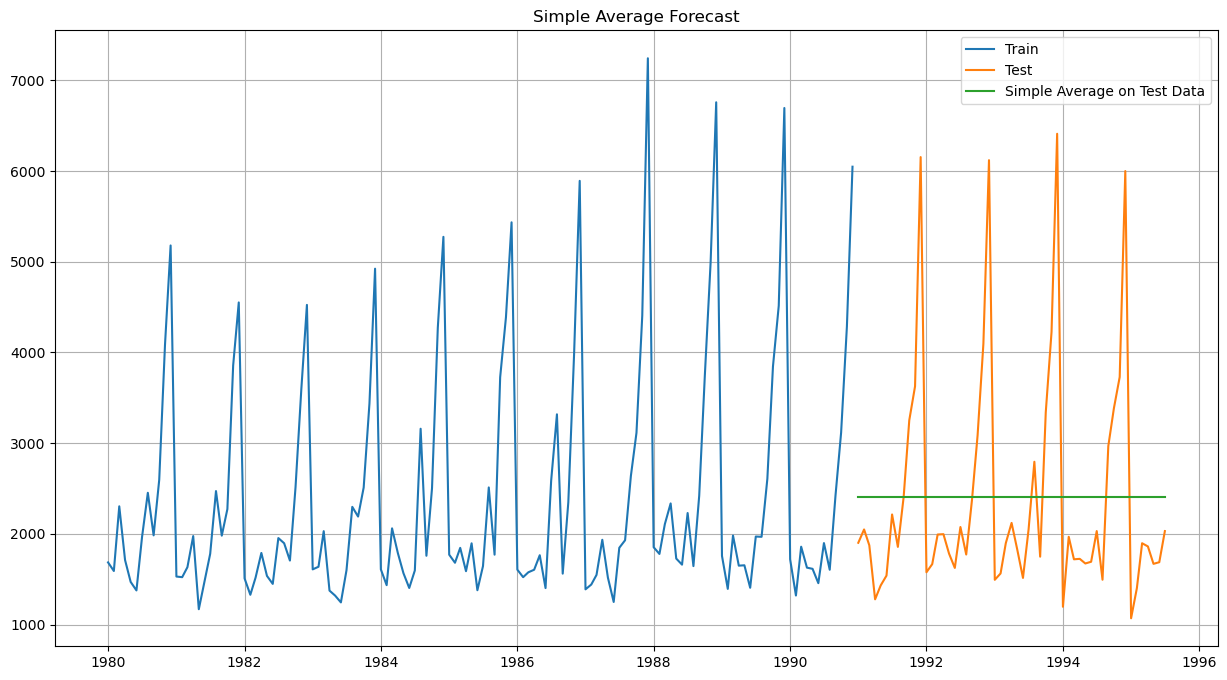

In [99]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [100]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])

In [101]:
resultsDf_Sim = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_Sim])
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336

## Moving Average

In [102]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling      Dates
Time_Stamp                      
1980-01-01       1686 1980-01-01
1980-02-01       1591 1980-02-01
1980-03-01       2304 1980-03-01
1980-04-01       1712 1980-04-01
1980-05-01       1471 1980-05-01

In [103]:
# 2 period Moving Average Computation
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
# 4 period Moving Average Computation
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
# 6 period Moving Average Computation
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
# 9 period Moving Average Computation
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling      Dates  Trailing_2  Trailing_4  Trailing_6  \
Time_Stamp                                                             
1980-01-01       1686 1980-01-01         NaN         NaN         NaN   
1980-02-01       1591 1980-02-01      1638.5         NaN         NaN   
1980-03-01       2304 1980-03-01      1947.5         NaN         NaN   
1980-04-01       1712 1980-04-01      2008.0     1823.25         NaN   
1980-05-01       1471 1980-05-01      1591.5     1769.50         NaN   

            Trailing_9  
Time_Stamp              
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

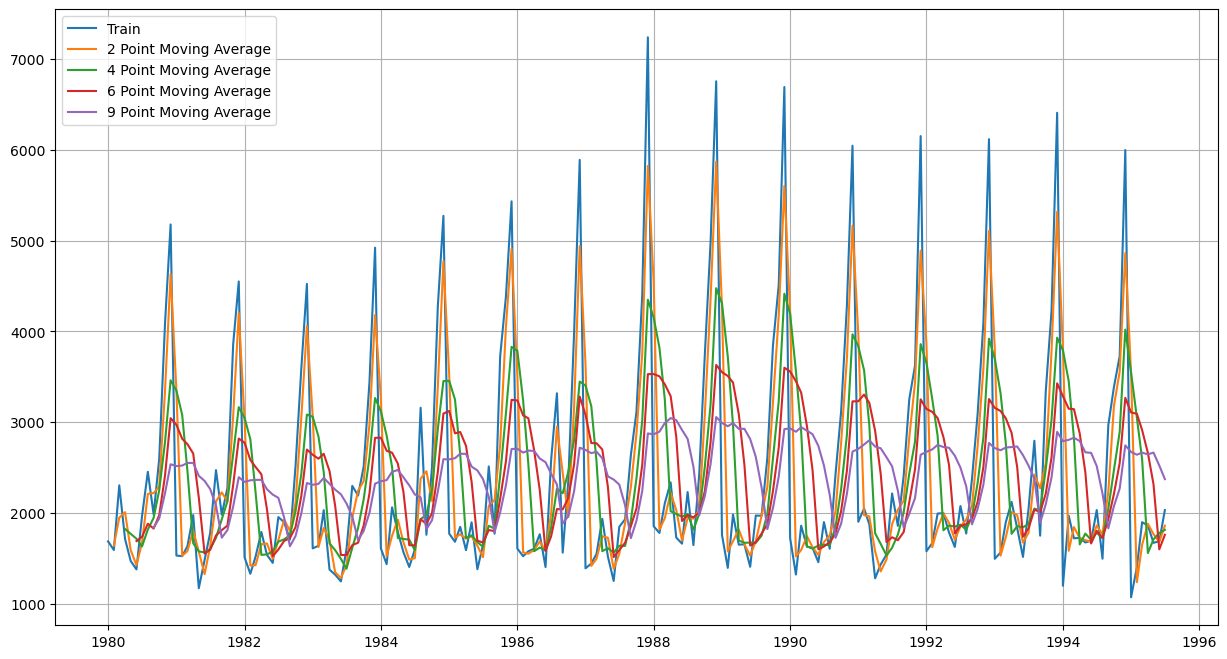

In [104]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [105]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991-01-01'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991-01-01']

In [106]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])

In [107]:
resultsDf_MOV = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_MOV])
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
6pointTrailingMovingAverage                         1283.927428   48.400376
9pointTrailingMovingAverage                         1346.278315   50.071571

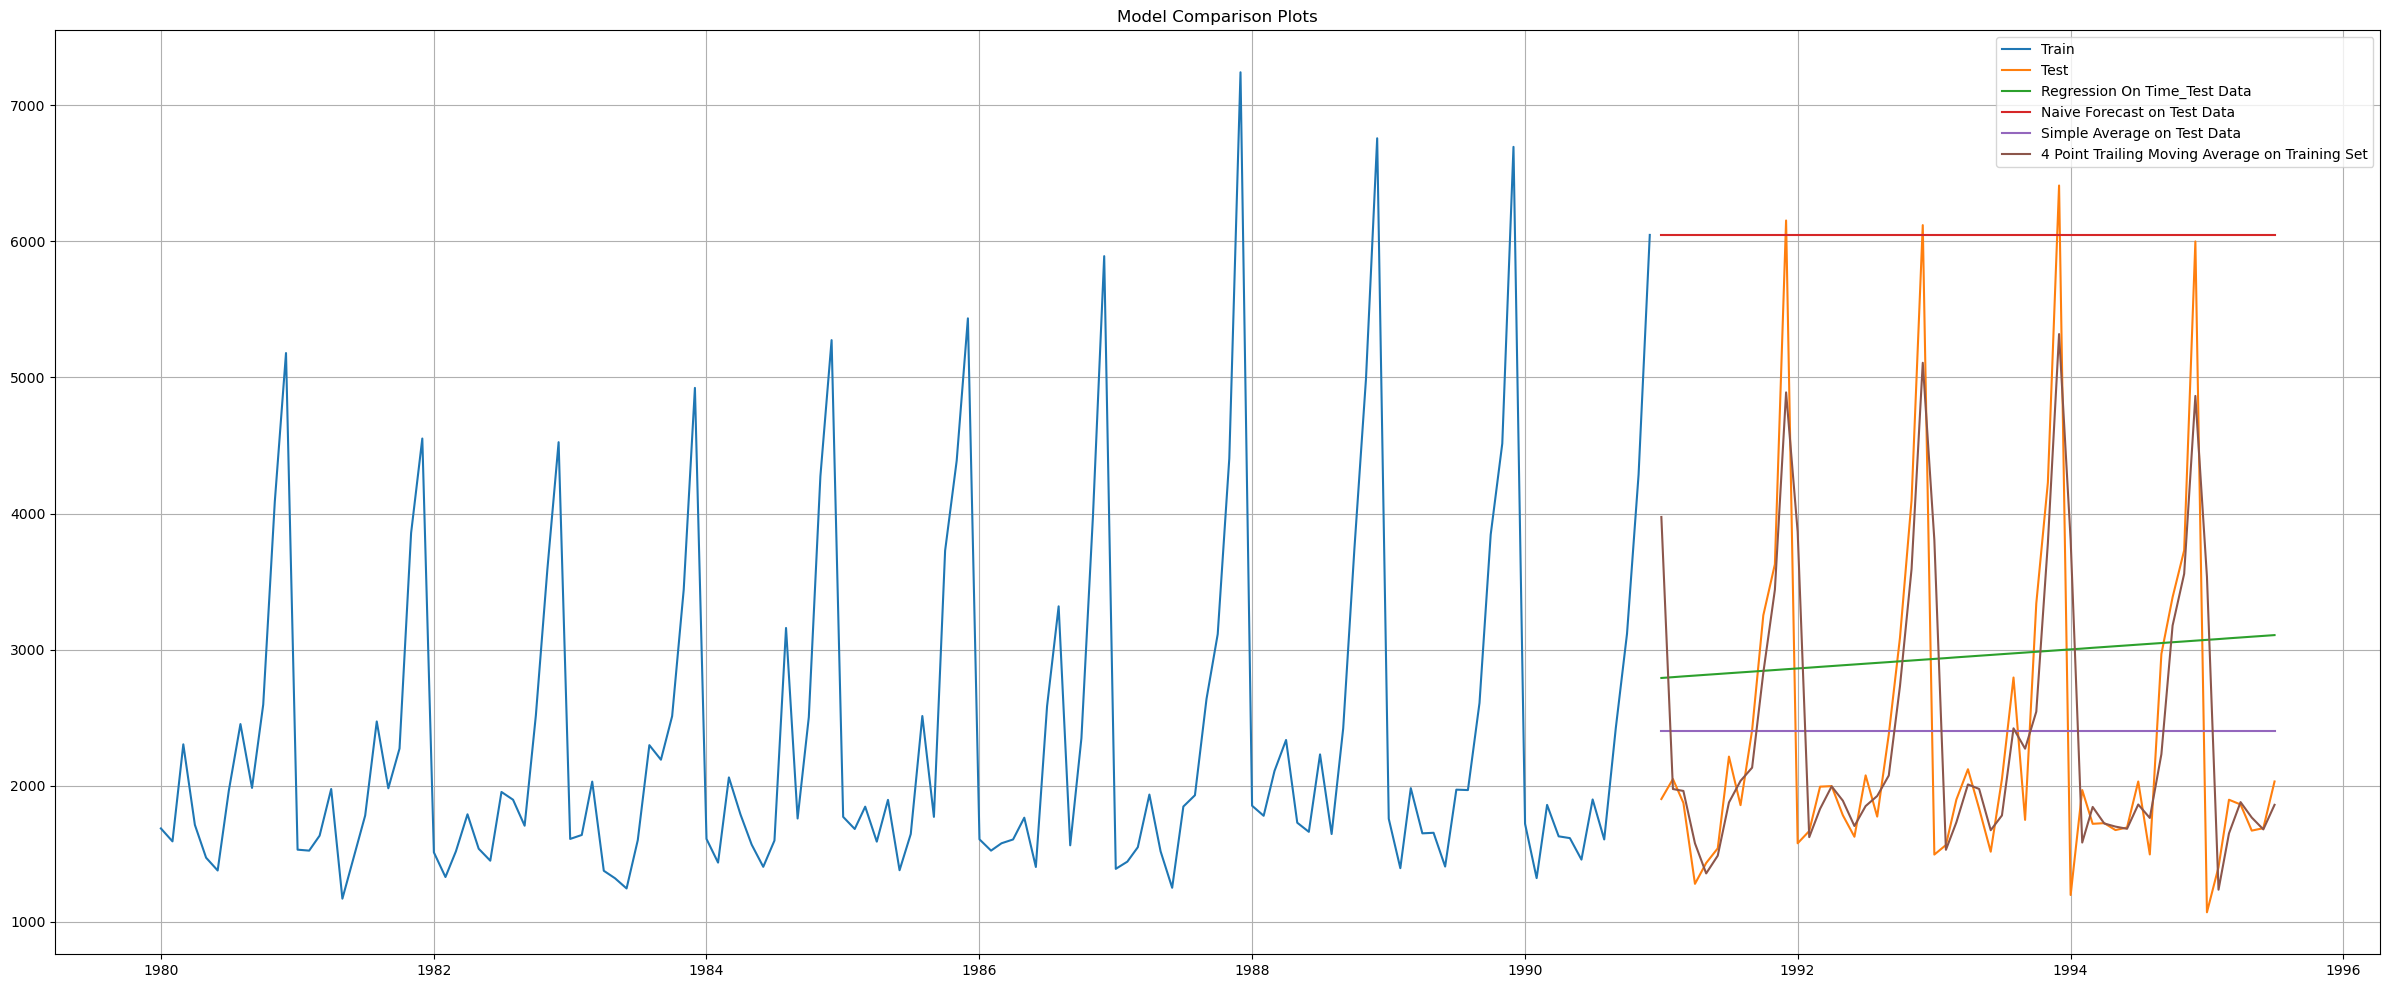

In [108]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegonTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [109]:
print('Sorted by RMSE values on the Test Data:')
display(resultsDf.sort_values(by=['Test RMSE']))
print('Sorted by MAPE values on the Test Data:')
display(resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data:


Test RMSE   Test MAPE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
SimpleAverageModel                                  1275.081804   39.157336
6pointTrailingMovingAverage                         1283.927428   48.400376
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
9pointTrailingMovingAverage                         1346.278315   50.071571
RegressionOnTime                                    1389.135175   59.345572
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
NaiveModel                                          3864.279352  201.327650

Sorted by MAPE values on the Test Data:


Test RMSE   Test MAPE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
2pointTrailingMovingAverage                          813.400684   24.711354
SimpleAverageModel                                  1275.081804   39.157336
4pointTrailingMovingAverage                         1156.589694   41.083652
6pointTrailingMovingAverage                         1283.927428   48.400376
9pointTrailingMovingAverage                         1346.278315   50.071571
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
RegressionOnTime                                    1389.135175   59.345572
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
NaiveModel                                          3864.279352  201.327650

- For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best (least) RMSE and MAPE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and $\gamma$ = 0.2.

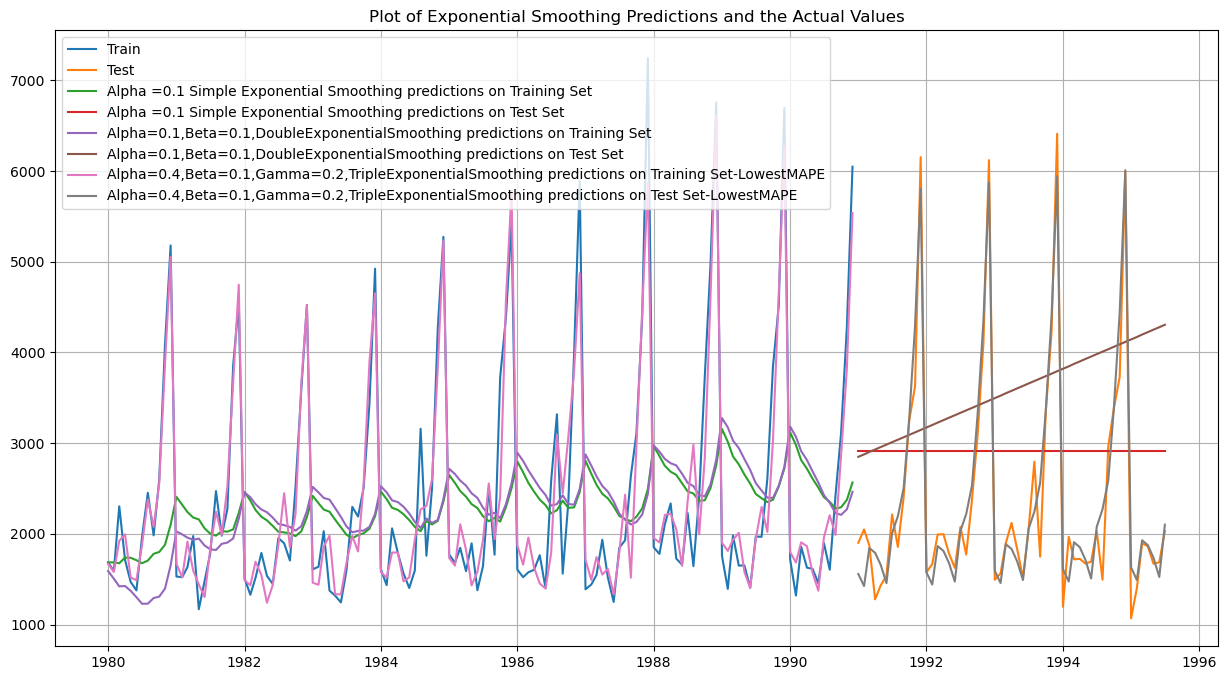

In [110]:
## Plotting on both the Training and Test data

# Plotting the actual training and test values
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

# Plotting the best Simple Exponential Smoothing Model
plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

# Plotting the best Double Exponential Smoothing Model
plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

# Plotting the best Triple Exponential Smoothing Model according to the lowest MAPE
plt.plot(TES_train['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set-LowestMAPE')
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set-LowestMAPE')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values');

**Best models to be built on the whole data are the following:**

* Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing


One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
    Note: Stationarity should be checked at alpha = 0.05.

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*


In [111]:
from statsmodels.tsa.stattools import adfuller

In [112]:
sales_ts = df['Sparkling']

Text(0, 0.5, 'Sparkling')

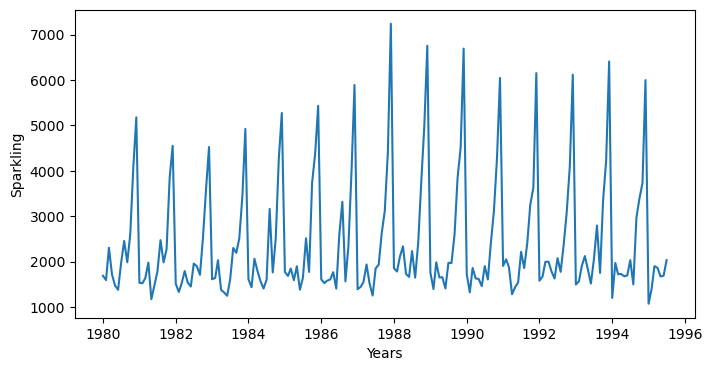

In [113]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')

- ***There is no trend in the time series***
- ***seasonality is prsent in the time series.***

Stationarity

In [114]:
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
print(dftest)

(-1.3604974548123372, 0.6010608871634854, 11, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 2573.1222090270685)


In [115]:
print('DF test statistic is %3.3f  ' %dftest[0])
print('DF test p-value is %1.4f  ' %dftest[1])
print('DF test Lag value is %1.0f  ' %dftest[2])
print('No of observations is %1.0f  ' %dftest[3])

DF test statistic is -1.360  
DF test p-value is 0.6011  
DF test Lag value is 11  
No of observations is 175  


 ***the p-value 0.6 is very large, and not smaller than 0.05 and thus is not a stationary series. We are failed to reject null hypothesis***

In [116]:
import calendar
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df['Year'] = dates.year

In [117]:
df

Sparkling      Dates Month  Year
Time_Stamp                                  
1980-01-01       1686 1980-01-01   Jan  1980
1980-02-01       1591 1980-02-01   Feb  1980
1980-03-01       2304 1980-03-01   Mar  1980
1980-04-01       1712 1980-04-01   Apr  1980
1980-05-01       1471 1980-05-01   May  1980
...               ...        ...   ...   ...
1995-03-01       1897 1995-03-01   Mar  1995
1995-04-01       1862 1995-04-01   Apr  1995
1995-05-01       1670 1995-05-01   May  1995
1995-06-01       1688 1995-06-01   Jun  1995
1995-07-01       2031 1995-07-01   Jul  1995

[187 rows x 4 columns]

In [118]:
monthly_sales_data = pd.pivot_table(df, values = "Sparkling", columns = "Year", index = "Month")
monthly_sales_data

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN

In [119]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

<AxesSubplot:xlabel='Month'>

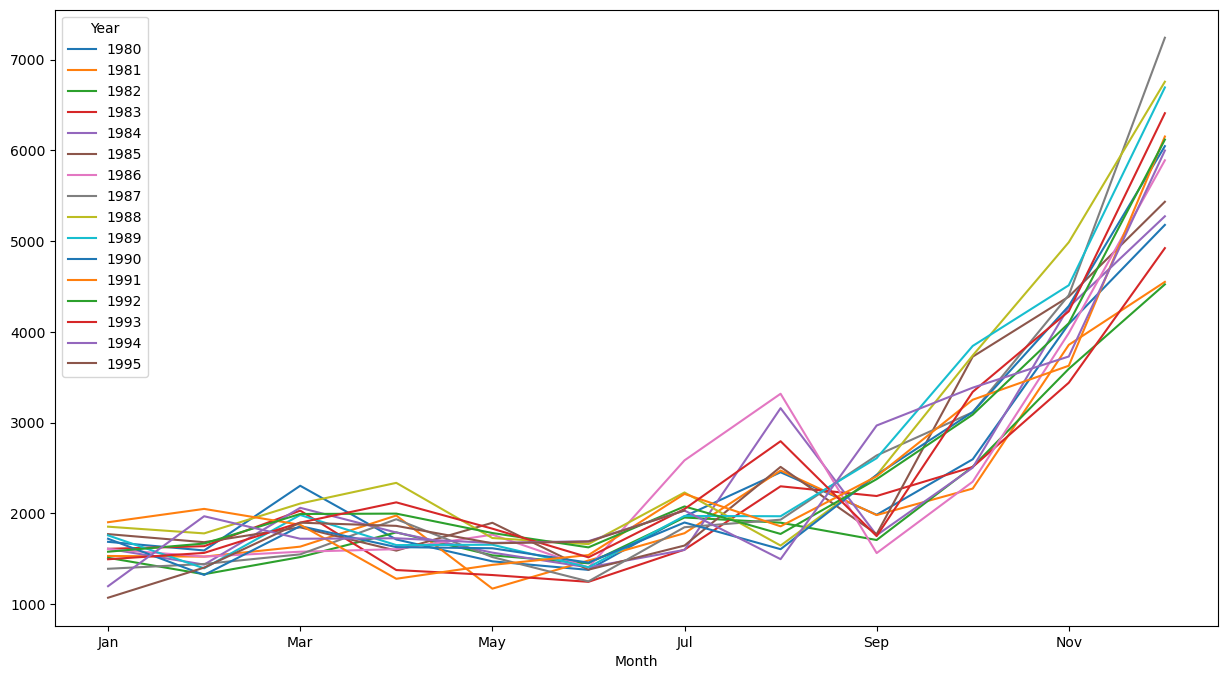

In [120]:
monthly_sales_data.plot()

<AxesSubplot:>

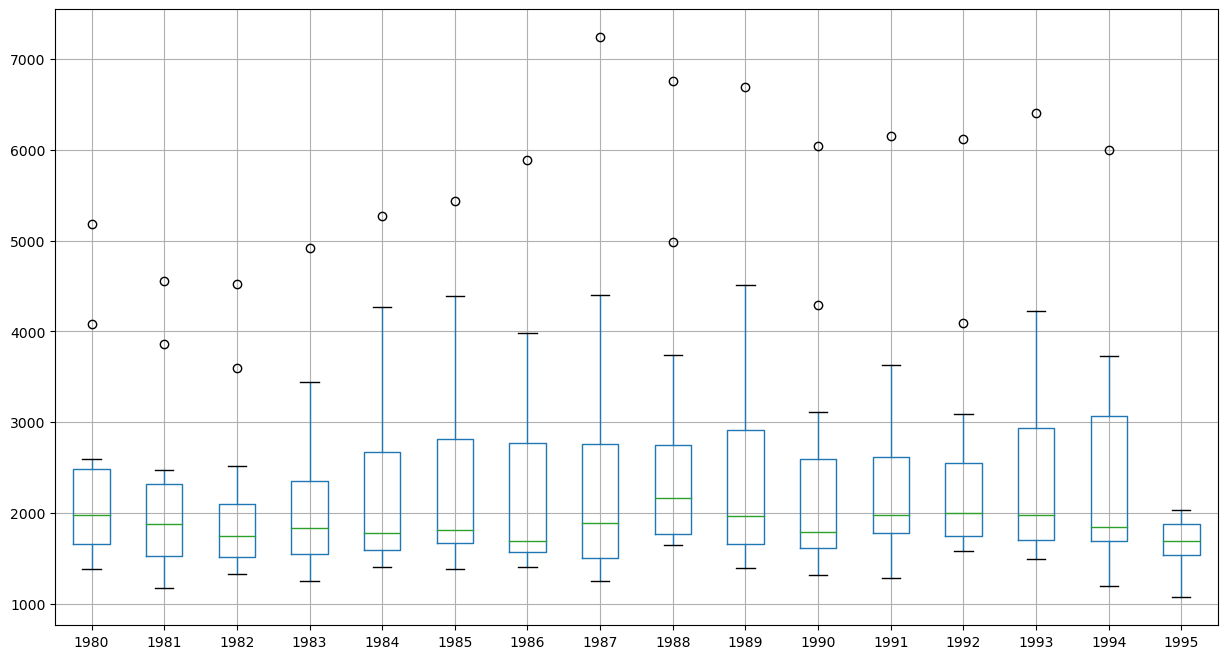

In [121]:
monthly_sales_data.boxplot()

In [122]:
yearly_sales_data = pd.pivot_table(df, values = "Sparkling", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep  \
Year                                                                            
1980   1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0  1984.0   
1981   1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0  1981.0   
1982   1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0  1706.0   
1983   1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0  2191.0   
1984   1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0  1759.0   
1985   1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0  1771.0   
1986   1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0  1562.0   
1987   1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0  2638.0   
1988   1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0  2421.0   
1989   1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0  2608.0   
1990   1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0  2424.0   
1991   1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0  2408.0   
1992   1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0  2377.0   
1993   1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0  1749.0   
1994   1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0  2968.0   
1995   1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN     NaN   

Month     Oct     Nov     Dec  
Year                           
1980   2596.0  4087.0  5179.0  
1981   2273.0  3857.0  4551.0  
1982   2514.0  3593.0  4524.0  
1983   2511.0  3440.0  4923.0  
1984   2504.0  4273.0  5274.0  
1985   3727.0  4388.0  5434.0  
1986   2349.0  3987.0  5891.0  
1987   3114.0  4405.0  7242.0  
1988   3740.0  4988.0  6757.0  
1989   3845.0  4514.0  6694.0  
1990   3116.0  4286.0  6047.0  
1991   3252.0  3627.0  6153.0  
1992   3088.0  4096.0  6119.0  
1993   3339.0  4227.0  6410.0  
1994   3385.0  3729.0  5999.0  
1995      NaN     NaN     NaN

<AxesSubplot:xlabel='Year'>

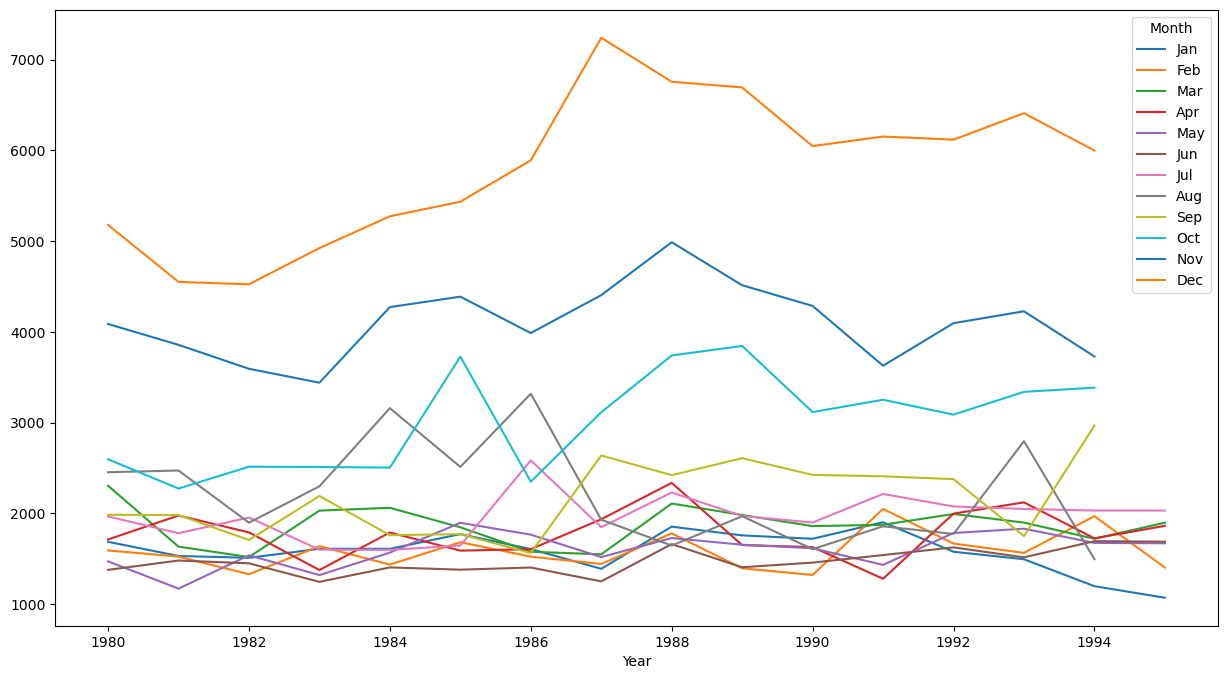

In [123]:
yearly_sales_data.plot()

<AxesSubplot:>

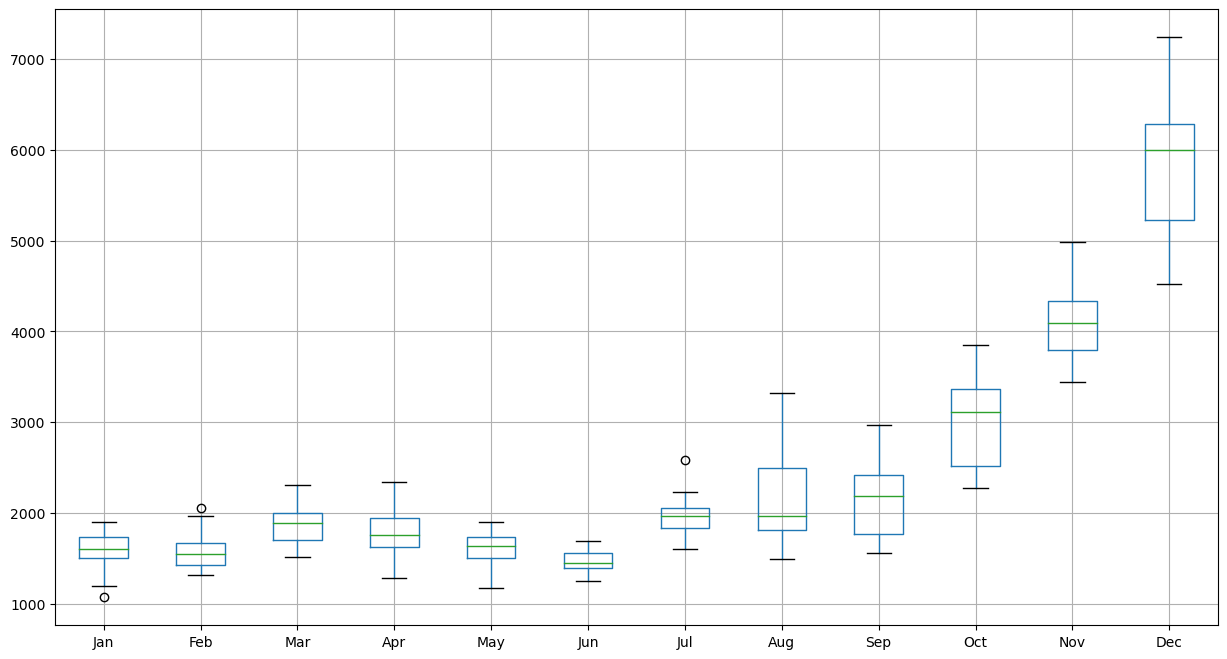

In [124]:
yearly_sales_data.boxplot()

#### Inferences:

- *The Sparkling sales have been significantly increasing in last quarter of every year.*
- *December month as the highest sparkling sales accorss all the year* 
- *Variance & Mean values in the last quarter(Oct, Nov and Dec) are higher than any of the other months.*
- *12 months seasonal cycle is present as mean of each month year on year starts with an flat trend in the beginning of the year and spikes upwards towards the end of the year.*

### Converting Time Series Data from Non-Stationary to Stationary

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


Text(0, 0.5, 'Truck Sales')

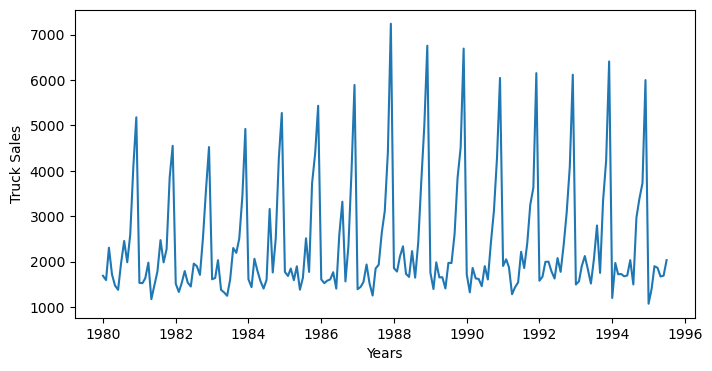

In [125]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

Text(0, 0.5, 'Sparkling')

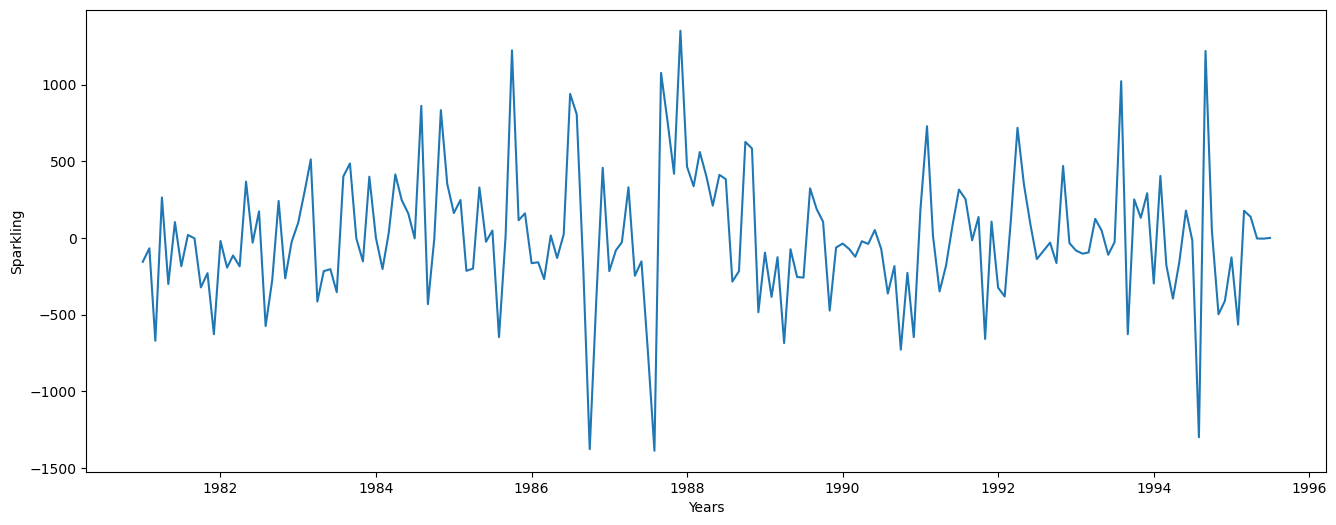

In [126]:
plt.figure(figsize=(16, 6))
plt.plot(sales_ts.diff(periods=12))
plt.xlabel('Years')
plt.ylabel('Sparkling')

Text(0, 0.5, 'Log (Truck Sales)')

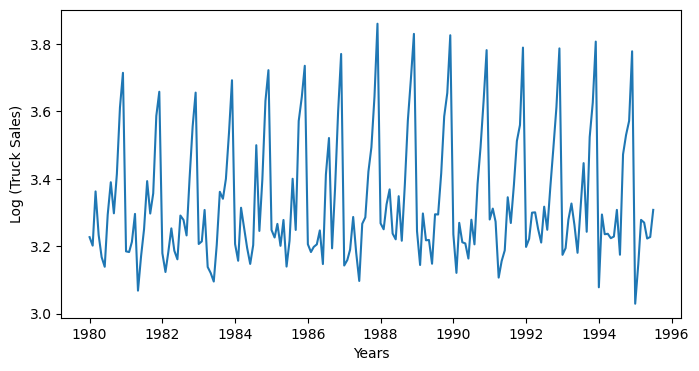

In [127]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Truck Sales)')

Text(0, 0.5, 'Differenced Log (Truck Sales)')

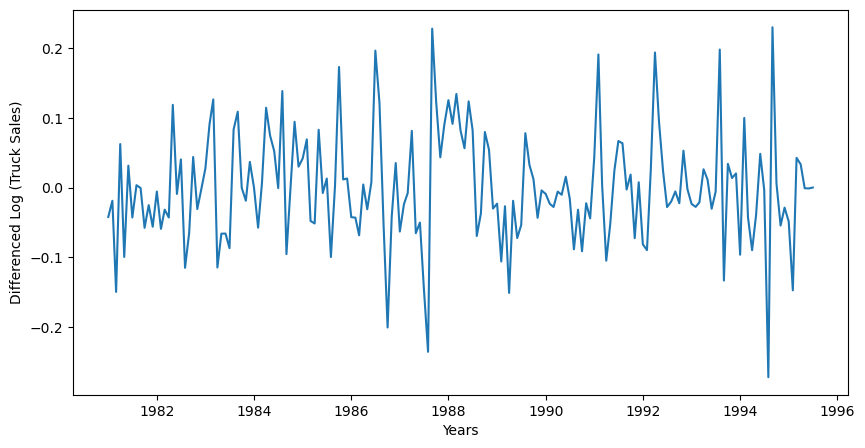

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=12))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Truck Sales)')

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model parameters

In [129]:
# Define the p parameter to take any value between 1 and 3
p= range(0,3)

# Define the q parameter to take any value between 1 and 3
q = range(0, 3)

d= range(1,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [130]:
seasonal_pdq

[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [131]:
#Separate data into train and test
df['Dates'] = df.index
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [132]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.209
DF test p-value is 0.6697


In [133]:
train_sales_ts_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [134]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [135]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [136]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:-58.665344313817236
ARIMA(0, 1, 1) - AIC:-60.024329987693335


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 1, 2) - AIC:-90.69163208606474
ARIMA(1, 1, 0) - AIC:-58.06880518330767
ARIMA(1, 1, 1) - AIC:-87.99711760823152


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 1, 2) - AIC:-91.00637572427613
ARIMA(2, 1, 0) - AIC:-66.7149761794162
ARIMA(2, 1, 1) - AIC:-91.8538221217054


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(2, 1, 2) - AIC:-98.78119347939447


In [137]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head(20)

param        AIC
8  (2, 1, 2) -98.781193
7  (2, 1, 1) -91.853822
5  (1, 1, 2) -91.006376
2  (0, 1, 2) -90.691632
4  (1, 1, 1) -87.997118
6  (2, 1, 0) -66.714976
1  (0, 1, 1) -60.024330
0  (0, 1, 0) -58.665344
3  (1, 1, 0) -58.068805

In [138]:
best_model = ARIMA(train_sales_ts_log,order = (2,1,2))
best_results = best_model.fit()

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [139]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  54.391
Date:                Wed, 22 Mar 2023   AIC                            -98.781
Time:                        23:14:04   BIC                            -84.405
Sample:                    01-01-1980   HQIC                           -92.940
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0077      0.008      0.967      0.334      -0.008       0.023
ar.L2         -0.9975      0.010    -98.572      0.000      -1.017      -0.978
ma.L1         -0.0576      0.090     -0.638      0.5

In [140]:
### Calculating RMSE to ARIMA Model

In [141]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [142]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.05)#forecasting values 

In [143]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [144]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 2857.626


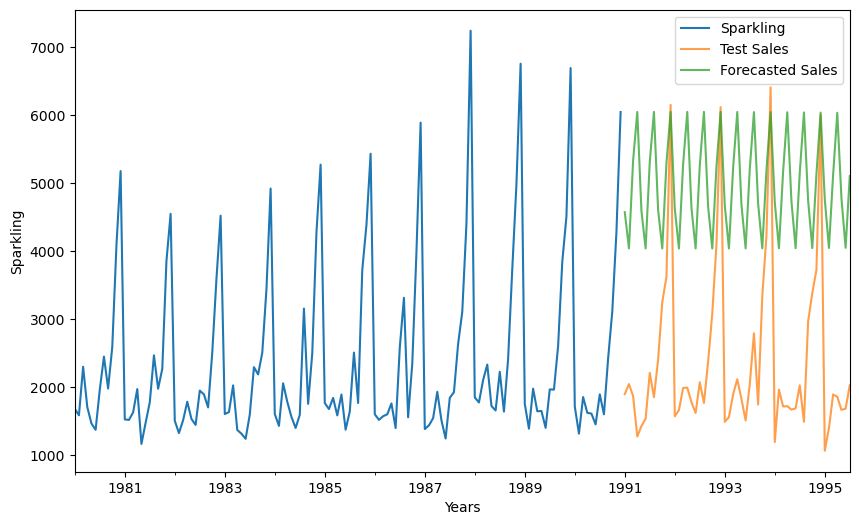

In [145]:
axis = train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.75)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [146]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Best ARIMA Model : ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_ARIMA])
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
6pointTrailingMovingAverage                         1283.927428   48.400376
9pointTrailingMovingAverage                         1346.278315   50.071571
Best ARIMA Model : ARIMA(2,1,2)                     2857.625960         NaN

####  Building SARIMA

In [147]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [148]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Some parameter combinations for Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [149]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:-209.91064381942726
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:-205.210408069403


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:-175.11378260458642
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:-200.40913589961724


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:-196.67576098647834


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:-173.2889258414567
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:-177.22797543082524


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:-175.2356670889359


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:-170.87276490280436
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:-256.1029419320406


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:-253.58476293321945


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:-218.55896745718306


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:-248.20817525013146


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:-247.01117654794862


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:-217.7269636436988


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:-220.45389861146057


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:-218.5480923978393


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:-211.89408853388724


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:-259.9213973939517


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:-249.20890399703353


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:-218.57705298315287


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:-248.01090552802953


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:-242.46916619998464


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:-217.11584499125993


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:-219.962667350807


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:-217.9804437812524


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:-213.24052255230632
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:-224.9583448788029


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:-223.18645136351884


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:-189.4787120243303
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:-213.86263431101096


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:-216.4848153685785


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:-188.4334388044067


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:-189.1512985625812


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:-187.3824299661703


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:-185.46983485701074
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:-259.55710865163053


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:-252.28291694636061


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:-217.361379774269


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:-245.28012055269545


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:-245.47599098424138


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:-216.4221050547854


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:-217.23881328712451


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:-215.26243504363643


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:-210.76635654937348


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:-257.95070549673966


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:-248.10669968520966


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:-217.83615203929014


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:-244.0638838230182


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:-242.33302972773885


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:-216.13559577262822


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:-216.27722336919962


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:-214.3903054129736


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:-212.14297985463
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:-232.9842325169088


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:-235.64046528850162


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:-200.4940597502929


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:-222.1830879434221


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:-225.2641693101688


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:-199.46694341351105


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:-198.80917368821292


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:-196.83111520771493


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:-194.9413882987301
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:-257.7015030740189


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:-250.3725486244652


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:-215.46644202557965


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:-240.3509154962432


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:-243.47779359357028


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:-214.68152072294583


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:-212.2955854749664


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:-210.3340703250326


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:-208.79632223144858


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:-258.6037391224848


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:-246.51354724638168
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:-215.8980572230612


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:-239.33411710464102
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:-240.3498485863027


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:-214.21225662731308


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:-211.45849692569365


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:-209.4932940158366


C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:-210.14745212650323


In [150]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal         AIC
18  (0, 1, 2)  (0, 1, 0, 12) -259.921397
36  (1, 1, 1)  (0, 1, 0, 12) -259.557109
72  (2, 1, 2)  (0, 1, 0, 12) -258.603739
45  (1, 1, 2)  (0, 1, 0, 12) -257.950705
63  (2, 1, 1)  (0, 1, 0, 12) -257.701503

In [151]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 2),
                                      seasonal_order=(0, 1, 0, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [152]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(0, 1, [], 12)   Log Likelihood                 134.777
Date:                             Wed, 22 Mar 2023   AIC                           -263.555
Time:                                     23:15:21   BIC                           -255.217
Sample:                                 01-01-1980   HQIC                          -260.169
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7698      0.142     -5.432      0.000      -1.048      -0.492
ma.L2         -0.2254      

In [153]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [154]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.05)

In [155]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [156]:
# Compute the root mean square error
mse = ((testCopy['Sparkling'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 339.112


In [157]:
resultsDf_SARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Best SARIMA Model : SARIMA(0, 1, 2)x(1, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_SARIMA])
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
6pointTrailingMovingAverage                         1283.927428   48.400376
9pointTrailingMovingAverage                         1346.278315   50.071571
Best ARIMA Model : ARIMA(2,1,2)                     2857.625960         NaN
Best SARIMA Model : SARIMA(0, 1, 2)x(1, 0, 1, 12)    339.111723         NaN

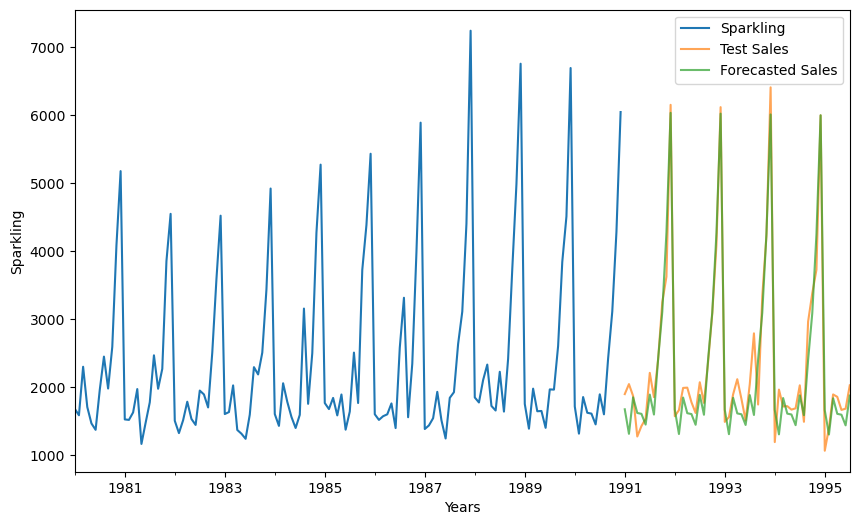

In [158]:
axis = train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')

plt.show()
plt.close()

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x500 with 0 Axes>

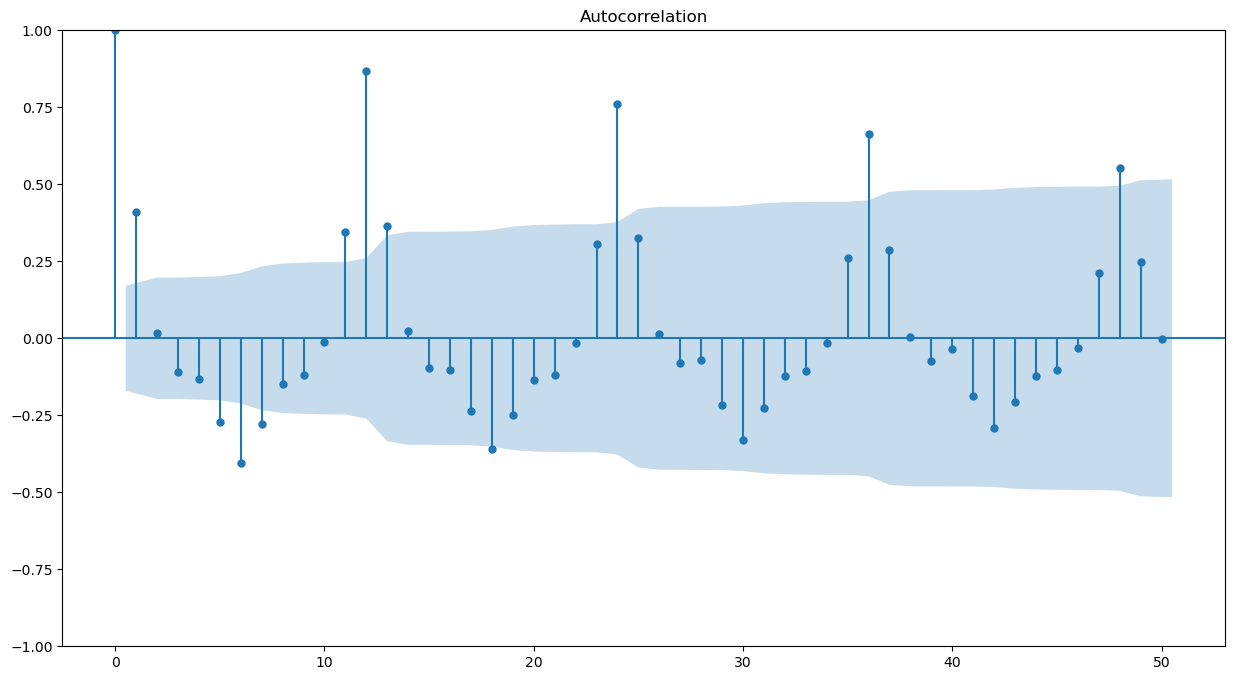

In [160]:
plt.figure(figsize=(10,5))
plot_acf(train['Sparkling'],lags = 50,alpha=0.05);

<Figure size 1000x500 with 0 Axes>

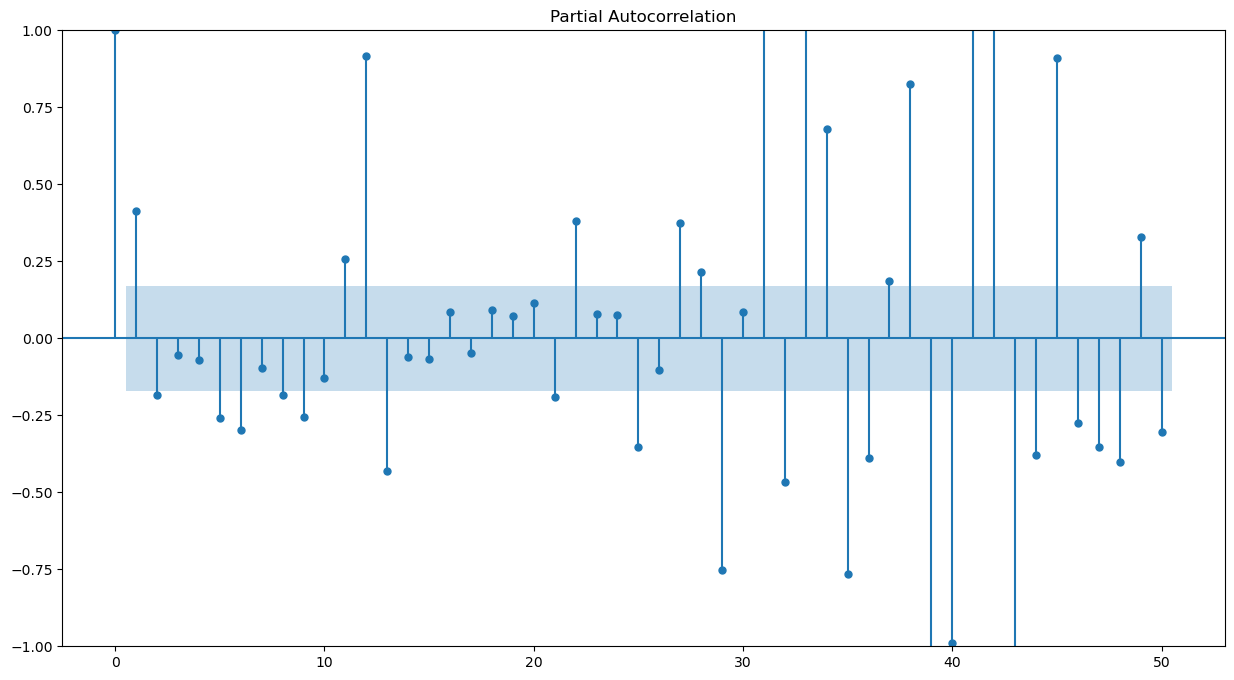

In [161]:
plt.figure(figsize=(10,5))
plot_pacf(train['Sparkling'],lags = 50,alpha=0.05);

In [162]:
test.head()

Sparkling      Dates Month  Year
Time_Stamp                                  
1991-01-01       1902 1991-01-01   Jan  1991
1991-02-01       2049 1991-02-01   Feb  1991
1991-03-01       1874 1991-03-01   Mar  1991
1991-04-01       1279 1991-04-01   Apr  1991
1991-05-01       1432 1991-05-01   May  1991

In [163]:
testCopy['sales_ts_forecasted'][0:5]

Time_Stamp
1991-01-01    1678.690783
1991-02-01    1318.405444
1991-03-01    1855.348766
1991-04-01    1624.802470
1991-05-01    1611.828003
Name: sales_ts_forecasted, dtype: float64

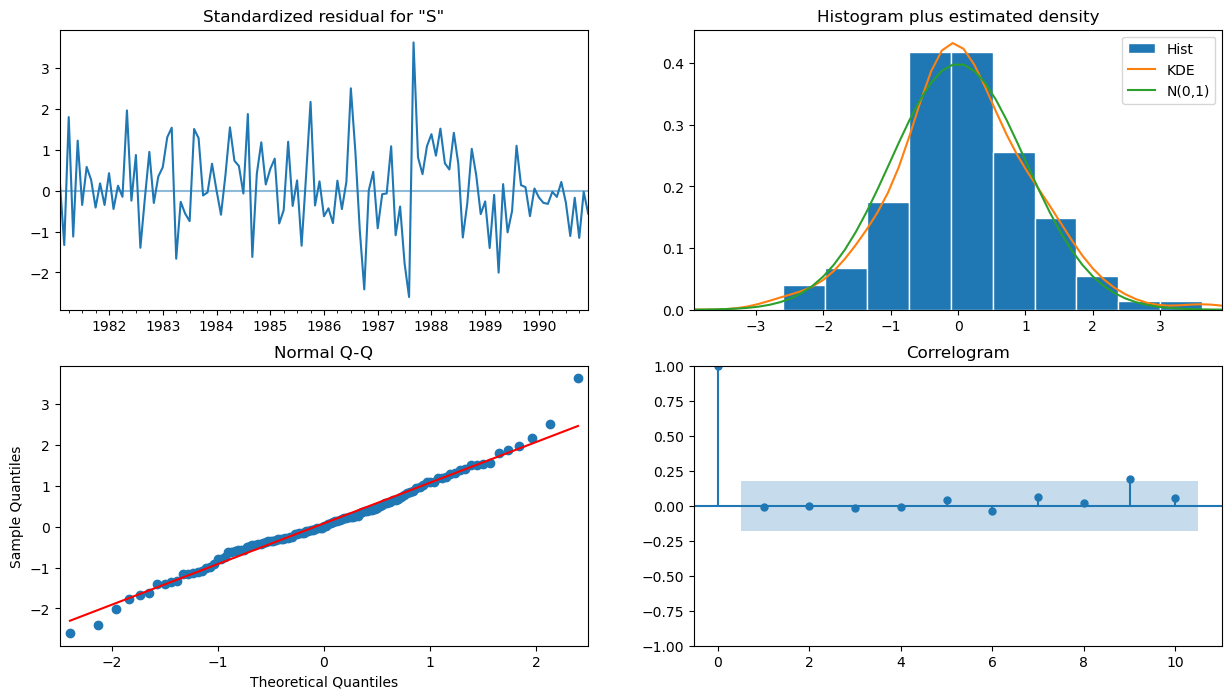

In [164]:
best_results.plot_diagnostics()
plt.show()

In [165]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 18
pred_uc_99 = best_results.get_forecast(steps=18, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=18, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [166]:
n_steps = 18
idx = pd.date_range(start='1995-01-01',end='1996-06-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head(18)

forecast  lower_ci_95  upper_ci_95  lower_ci_99  upper_ci_99
1995-01-01  1678.690783  1185.967119  2376.122154  1185.967119  2376.122154
1995-02-01  1318.405444   922.656945  1883.899454   922.656945  1883.899454
1995-03-01  1855.348766  1298.419835  2651.160243  1298.419835  2651.160243
1995-04-01  1624.802470  1137.073311  2321.735143  1137.073311  2321.735143
1995-05-01  1611.828003  1127.989108  2303.204430  1127.989108  2303.204430
1995-06-01  1454.138328  1017.630805  2077.883518  1017.630805  2077.883518
1995-07-01  1895.270203  1326.337267  2708.247165  1326.337267  2708.247165
1995-08-01  1601.847644  1120.991601  2288.969759  1120.991601  2288.969759
1995-09-01  2419.239058  1693.005042  3456.999523  1693.005042  3456.999523
1995-10-01  3109.879912  2176.313215  4443.915977  2176.313215  4443.915977
1995-11-01  4277.581933  2993.466698  6112.547436  2993.466698  6112.547436
1995-12-01  6035.123179  4223.383774  8624.059222  4223.383774  8624.059222
1996-01-01  1675.393692  1015.398731  2764.376138  1015.398731  2764.376138
1996-02-01  1315.815984   791.746620  2186.774986   791.746620  2186.774986
1996-03-01  1851.704704  1114.186909  3077.410336  1114.186909  3077.410336
1996-04-01  1621.611220   975.727003  2695.039639   975.727003  2695.039639
1996-05-01  1608.662236   967.925010  2673.548222   967.925010  2673.548222
1996-06-01  1451.282277   873.220653  2412.013782   873.220653  2412.013782

### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [167]:
resultsDf

Test RMSE   Test MAPE
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
RegressionOnTime                                    1389.135175   59.345572
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
6pointTrailingMovingAverage                         1283.927428   48.400376
9pointTrailingMovingAverage                         1346.278315   50.071571
Best ARIMA Model : ARIMA(2,1,2)                     2857.625960         NaN
Best SARIMA Model : SARIMA(0, 1, 2)x(1, 0, 1, 12)    339.111723         NaN

In [168]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE   Test MAPE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302   11.534936
Alpha=0.3,Beta=0.2,Gamma=0.2,TripleExponentialS...   329.037543   12.201611
Best SARIMA Model : SARIMA(0, 1, 2)x(1, 0, 1, 12)    339.111723         NaN
2pointTrailingMovingAverage                          813.400684   24.711354
4pointTrailingMovingAverage                         1156.589694   41.083652
SimpleAverageModel                                  1275.081804   39.157336
6pointTrailingMovingAverage                         1283.927428   48.400376
Alpha=0.1,SimpleExponentialSmoothing                1316.035487   50.940345
9pointTrailingMovingAverage                         1346.278315   50.071571
RegressionOnTime                                    1389.135175   59.345572
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670   85.874037
Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing       1778.564670   85.874037
Best ARIMA Model : ARIMA(2,1,2)                     2857.625960         NaN
NaiveModel                                          3864.279352  201.327650

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [169]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 18
pred_uc_99 = best_results.get_forecast(steps=18, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=18, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [170]:
n_steps = 18
idx = pd.date_range(start='1995-01-01',end='1996-06-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head(18)

forecast  lower_ci_95  upper_ci_95  lower_ci_99  upper_ci_99
1995-01-01  1678.690783  1185.967119  2376.122154  1185.967119  2376.122154
1995-02-01  1318.405444   922.656945  1883.899454   922.656945  1883.899454
1995-03-01  1855.348766  1298.419835  2651.160243  1298.419835  2651.160243
1995-04-01  1624.802470  1137.073311  2321.735143  1137.073311  2321.735143
1995-05-01  1611.828003  1127.989108  2303.204430  1127.989108  2303.204430
1995-06-01  1454.138328  1017.630805  2077.883518  1017.630805  2077.883518
1995-07-01  1895.270203  1326.337267  2708.247165  1326.337267  2708.247165
1995-08-01  1601.847644  1120.991601  2288.969759  1120.991601  2288.969759
1995-09-01  2419.239058  1693.005042  3456.999523  1693.005042  3456.999523
1995-10-01  3109.879912  2176.313215  4443.915977  2176.313215  4443.915977
1995-11-01  4277.581933  2993.466698  6112.547436  2993.466698  6112.547436
1995-12-01  6035.123179  4223.383774  8624.059222  4223.383774  8624.059222
1996-01-01  1675.393692  1015.398731  2764.376138  1015.398731  2764.376138
1996-02-01  1315.815984   791.746620  2186.774986   791.746620  2186.774986
1996-03-01  1851.704704  1114.186909  3077.410336  1114.186909  3077.410336
1996-04-01  1621.611220   975.727003  2695.039639   975.727003  2695.039639
1996-05-01  1608.662236   967.925010  2673.548222   967.925010  2673.548222
1996-06-01  1451.282277   873.220653  2412.013782   873.220653  2412.013782

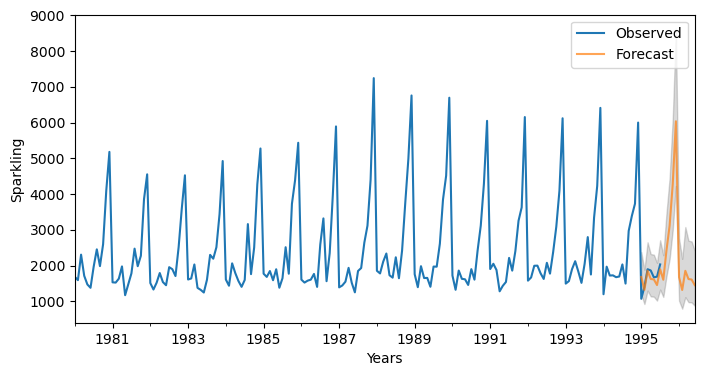

In [171]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.